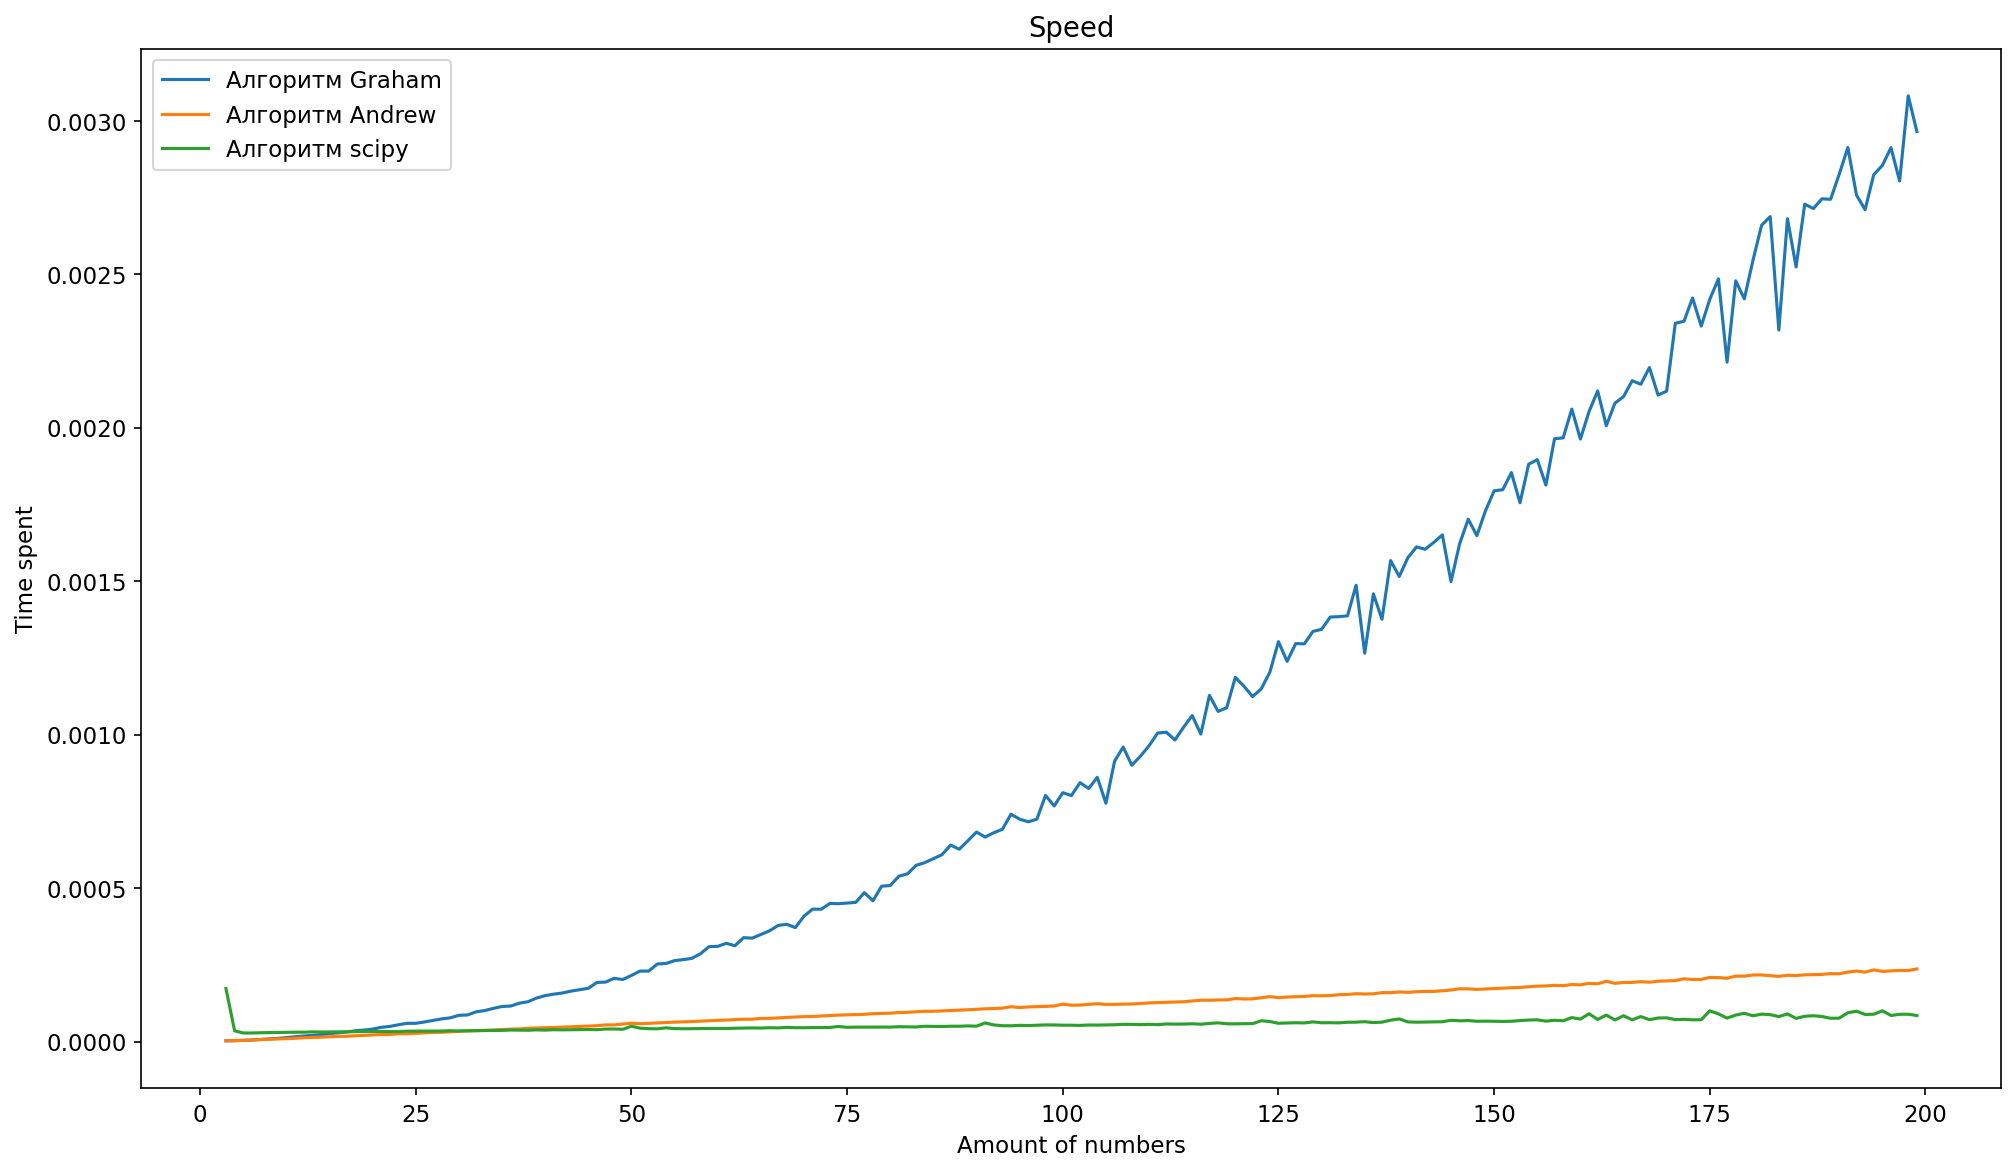

In [1]:
from scipy.spatial import ConvexHull
import random
import matplotlib.pyplot as plt
import time

def convert_lines_to_coordinates(lines):
    coordinates = []
    for line in lines:
        # Remove any leading/trailing whitespace and split the line by space
        values = line.strip().split(' ')
        
        # Convert the values to integers and create a coordinate list
        coordinate = [int(value) for value in values]
        
        # Add the coordinate to the list
        coordinates.append(coordinate)
    
    return coordinates

def rotate(A,B,C):
    return (B[0]-A[0])*(C[1]-B[1])-(B[1]-A[1])*(C[0]-B[0])

def grahamscan(A):
    n = len(A) # число точек
    P = list(range(n)) # список номеров точек
    for i in range(1, n):
        if A[P[i]][0] < A[P[0]][0]: # если P[i]-ая точка лежит левее P[0]-ой точки
            P[i], P[0] = P[0], P[i] # меняем местами номера этих точек 
    for i in range(2, n): # сортировка вставкой
        j = i
        while j > 1 and (rotate(A[P[0]], A[P[j-1]], A[P[j]]) < 0): 
            P[j], P[j-1] = P[j-1], P[j]
            j -= 1
    S = [P[0], P[1]] # создаем стек
    for i in range(2, n):
        while rotate(A[S[-2]], A[S[-1]], A[P[i]]) < 0:
            del S[-1] # pop(S)
        S.append(P[i]) # push(S,P[i])
    return S

file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randPoints/2", "r")
coords = convert_lines_to_coordinates(file.readlines())
file.close()



def andrew_algorithm(coordinates):
    # Sort the coordinates lexicographically
    sorted_indices = sorted(range(len(coordinates)), key=lambda i: coordinates[i])
    
    # Find the lower hull
    lower_hull = []
    for idx in sorted_indices:
        while len(lower_hull) >= 2 and rotate(coordinates[lower_hull[-2]], coordinates[lower_hull[-1]], coordinates[idx]) <= 0:
            lower_hull.pop()
        lower_hull.append(idx)
    
    # Find the upper hull
    upper_hull = []
    for idx in reversed(sorted_indices):
        while len(upper_hull) >= 2 and rotate(coordinates[upper_hull[-2]], coordinates[upper_hull[-1]], coordinates[idx]) <= 0:
            upper_hull.pop()
        upper_hull.append(idx)
    
    # Concatenate the lower and upper hulls
    hull = lower_hull[:-1] + upper_hull[:-1]
    
    return hull



def find_convex_hull(coordinates):
    # Create a ConvexHull object from the coordinates
    hull = ConvexHull(coordinates)
    
    # Get the indices of the vertices in the convex hull
    hull_indices = hull.vertices
    
    return hull_indices


def generate_random_coordinates(size):
    coordinates = []
    for _ in range(size):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        coordinates.append([x, y])
    return coordinates


timegrah=[]
timeandrew=[]
timescipy=[]
timeg=0
timea=0
times=0
x=[]

repeats=10

for i in range(3,200,1):
    timeg=0
    timea=0
    times=0
    for j in range(repeats):
        coords=generate_random_coordinates(i)

        start_time=time.time()
        grahamscan(coords)
        timeg+=time.time()-start_time

        start_time=time.time()
        andrew_algorithm(coords)
        timea+=time.time()-start_time

        start_time=time.time()
        find_convex_hull(coords)
        times+=time.time()-start_time
        
    timegrah.append  (timeg/repeats)
    timeandrew.append(timea/repeats)
    timescipy.append (times/repeats)
    
    x.append(i)
    
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11
    
plt.plot(x, timegrah,   label = 'Алгоритм Graham')
plt.plot(x, timeandrew, label = 'Алгоритм Andrew')
plt.plot(x, timescipy,  label = 'Алгоритм scipy')

plt.xlabel('Amount of numbers')
plt.ylabel('Time spent')
plt.title ('Speed')

plt.legend()
plt.show()


# print("coords",coords, "\n")

# print("grahamscan(coords)      ",grahamscan(coords))
# print("andrew_algorithm(coords)",andrew_algorithm(coords))
# print("find_convex_hull(coords)",find_convex_hull(coords))


[(50, 73, 6140), (34, -11, -75), (-63, 26, 20), (-23, 28, -381), (-88, -24, -4288), (51, -14, 3204), (-34, 9, 141), (14, -70, -1176), (73, -37, 2255), (-54, 25, -1164)]
[(20.469986807387862, 70.08905013192611), (26.814714358365826, 65.74334632988642), (64.86943812926275, 39.67846703475154), (31.712098009188363, 62.388973966309344), (72.31562288039792, 34.578340492878134), (15.336630286493861, 73.6050477489768), (76.06191950464397, 32.01238390092879), (54.57514974230394, 46.72934949157264), (45.930662557781204, 52.6502311248074), (20.469986807387862, 70.08905013192611), (-9.057591623036648, -21.17801047120419), (-9.0, -21.0), (25.430493273542602, 85.42152466367713), (426.98823529411766, 1326.6), (-12.882352941176471, -33.0), (3.452830188679245, 17.49056603773585), (-60.61538461538461, -180.53846153846155), (-57.33984375, -170.4140625), (26.814714358365826, 65.74334632988642), (-9.057591623036648, -21.17801047120419), (-8.975986277873071, -20.980274442538594), (29.21263157894737, 71.5536

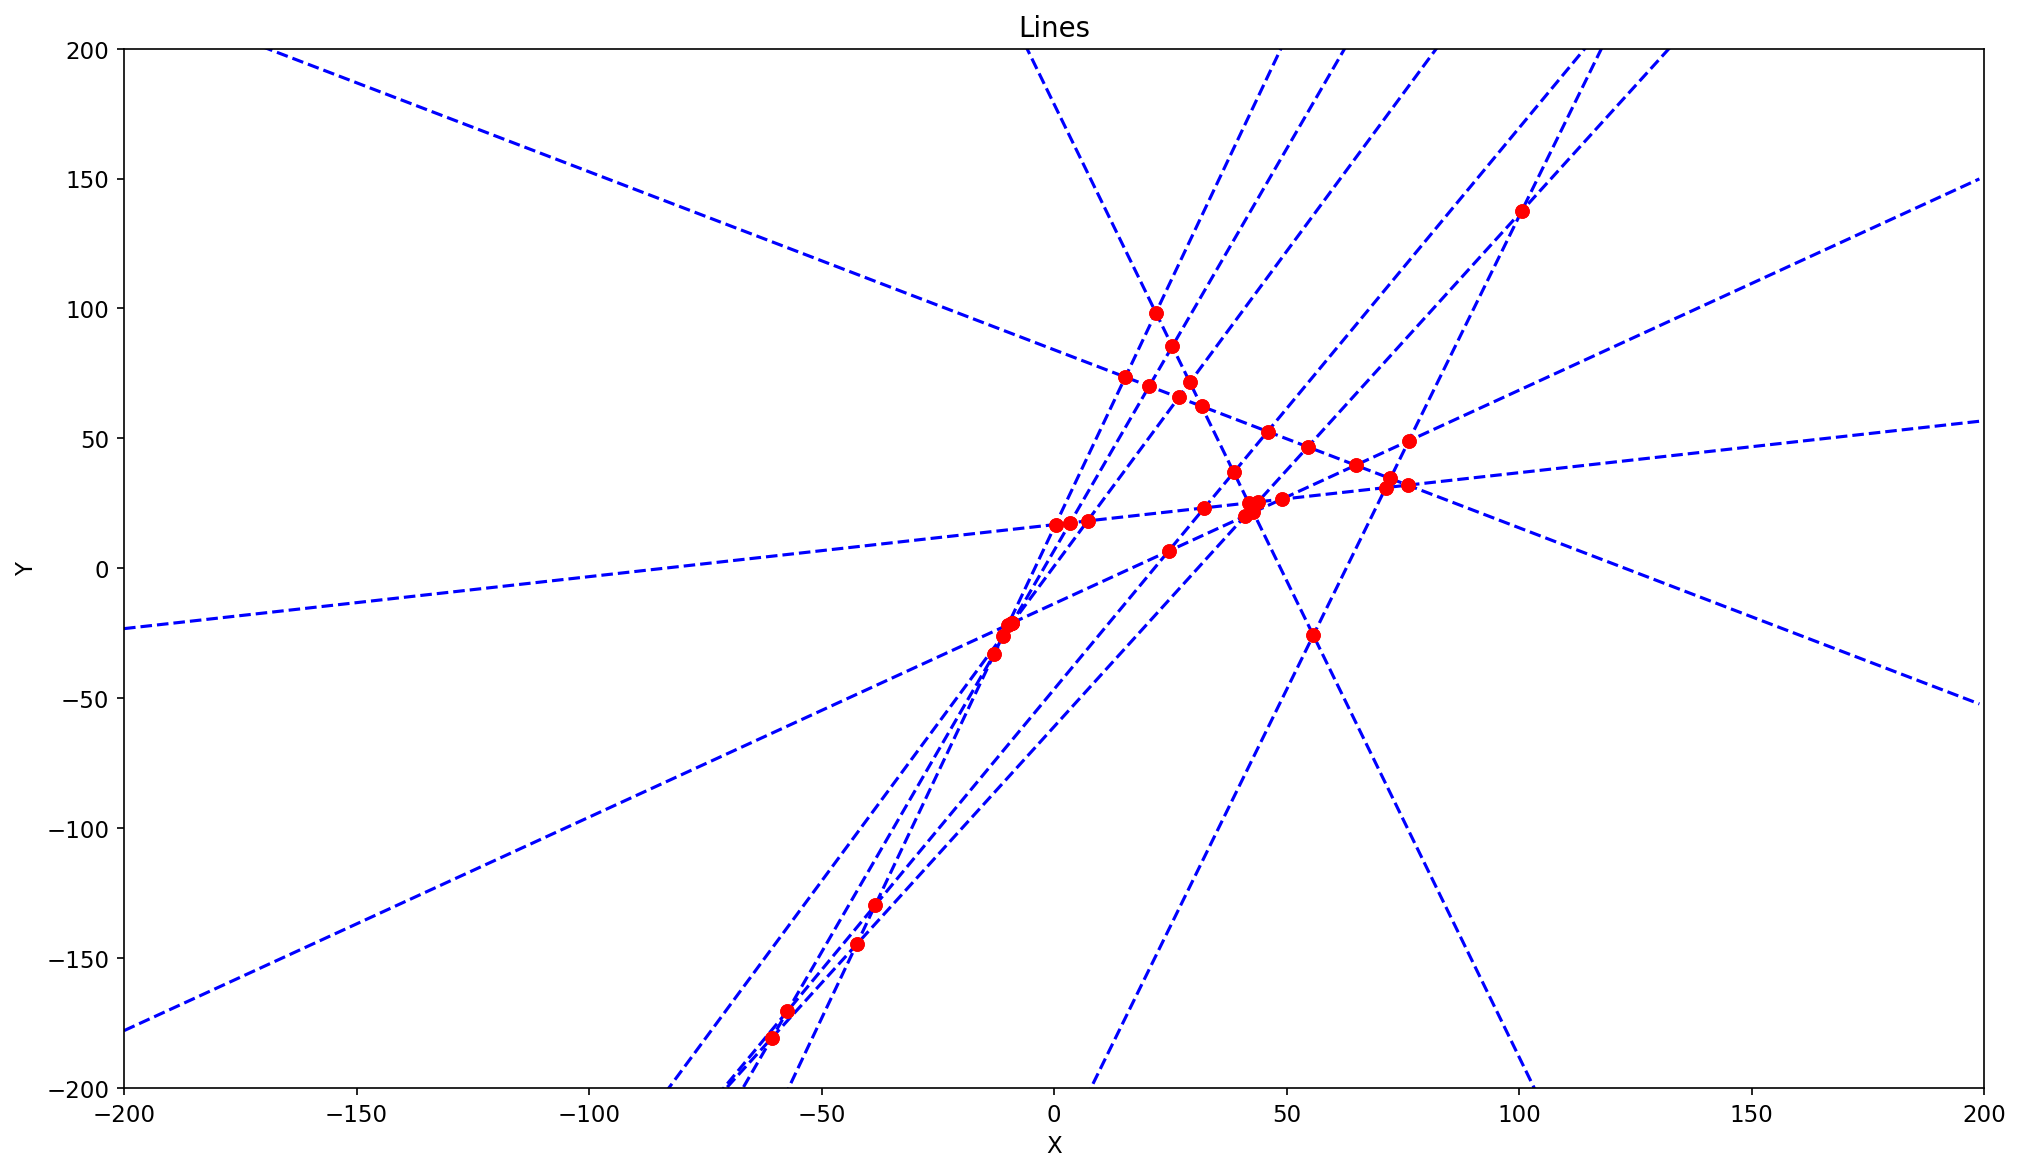

In [2]:
from __future__ import division 
import matplotlib.pyplot as plt
import numpy as np

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False
    

def save_points_and_lines(input_array):
    point = [[],[]]
    coordinates = []
    for item in input_array:
        # Remove any leading/trailing whitespace and split the item by semicolon and newline
        coords = item.strip().split(';')
        # Split the point and line strings by space
        coords = [coords[0].split(), coords[1].split()]
        
        # Convert the point and line coordinates to integers and create coordinate lists
        for dots in range(len(coords)):
                coords[dots][0]=int(coords[dots][0])
                coords[dots][1]=int(coords[dots][1])
        
        # Add the point and line to their respective lists
        coordinates.append(coords)
    return coordinates

# Example usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
point_array= save_points_and_lines(lines)

iteartor=0
L=[]
for each in point_array:
    L.append(line(each[0],each[1]))
    
print(L)
    
    
intersections=[]
for each1 in L:
    for each2 in L:
        intecect=intersection(each1,each2)
        if intecect!=False:
            intersections.append(intecect)
            
print(intersections)



plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11
# Create a figure and axes
fig, ax = plt.subplots()


plot_size=200


# Set limits for the x and y axes
ax.set_xlim(-plot_size, plot_size)
ax.set_ylim(-plot_size, plot_size)

# Plot the lines
for coeffs in L:
    A, B, C = coeffs
    if B != 0:
        x = np.arange(-plot_size, plot_size)
        y = (A * x - C) / (-B)
        ax.plot(x, y, 'b--')
        
for dot in intersections:
    x = dot[0]
    y = dot[1]
    ax.plot(x, y, 'ro')
#     ax.text(x, y, f"{i + 1}", color='black', fontsize=10, ha='center', va='center')


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lines')

# Show the plot
plt.show()

        
        




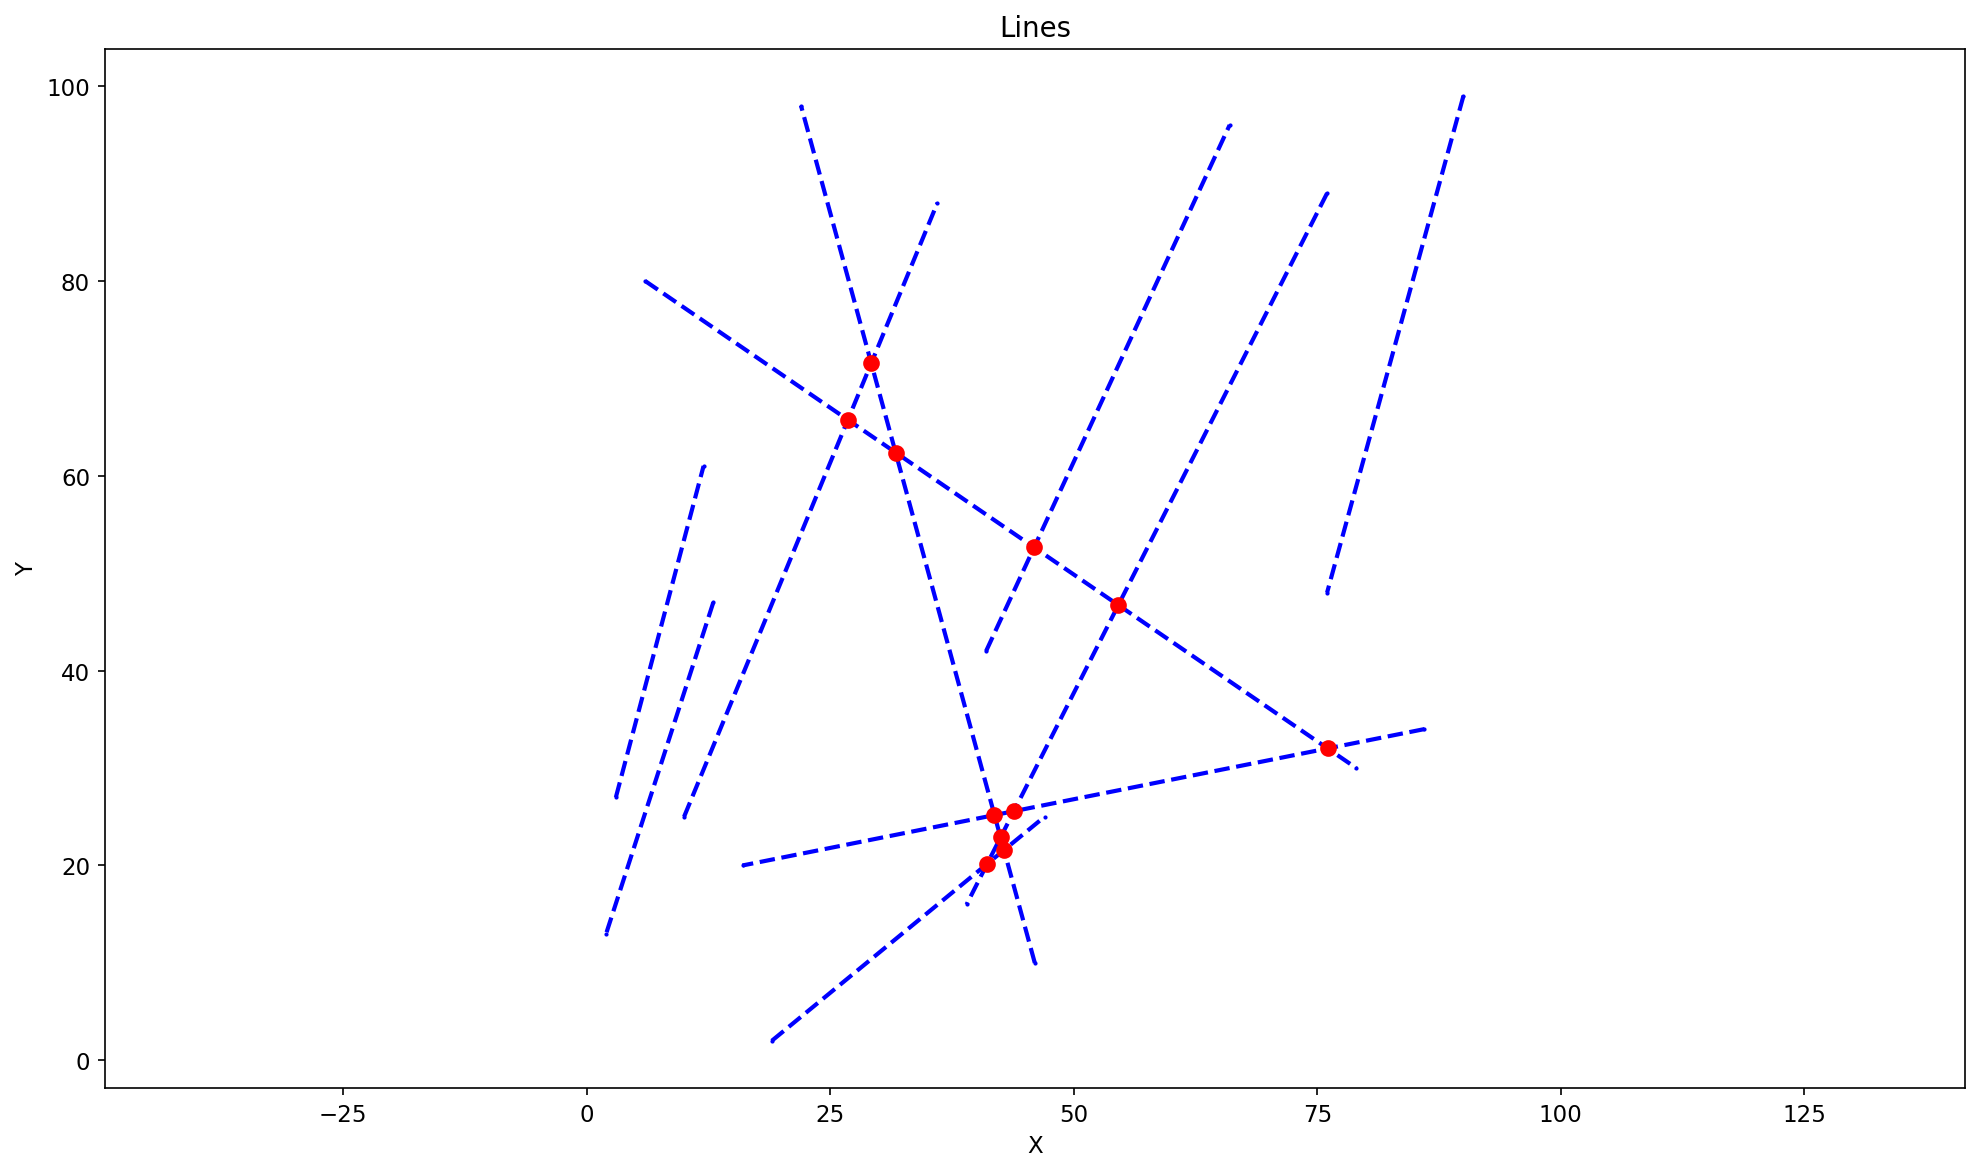

In [3]:
import matplotlib.pyplot as plt
from __future__ import division 
import numpy as np


plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11
# Create a figure and axes
fig, ax = plt.subplots()


plot_size=200


# Set limits for the x and y axes
ax.set_xlim(-plot_size, plot_size)
ax.set_ylim(-plot_size, plot_size)


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lines')

def calculate_intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4

    # Calculate the determinant of the coefficient matrix
    determinant = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    # If the determinant is zero, the line segments are parallel and do not intersect
    if determinant == 0:
        return None

    # Calculate the intersection point coordinates
    intersection_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / determinant
    intersection_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / determinant

    return intersection_x, intersection_y

    
def find_segment_intersections(lines):
    intersections = []
    
    # Iterate over each pair of line segments
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i]
            line2 = lines[j]
            
            # Get the coordinates of the line segment endpoints
            p1, p2 = line1[0], line1[1]
            p3, p4 = line2[0], line2[1]
            
            # Calculate the line segment intersection
            intersection = calculate_intersection(p1, p2, p3, p4)
            
            # If an intersection is found and both line segments contain the intersection point,
            # add it to the intersections list
            if intersection is not None and is_point_on_line_segment(intersection, p1, p2) and is_point_on_line_segment(intersection, p3, p4):
                intersections.append(intersection)
    
    return intersections


def is_point_on_line_segment(point, p1, p2):
    # Calculate the minimum and maximum x and y coordinates of the line segment
    min_x = min(p1[0], p2[0])
    max_x = max(p1[0], p2[0])
    min_y = min(p1[1], p2[1])
    max_y = max(p1[1], p2[1])
    
    # Check if the point's coordinates lie within the line segment's range
    if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y:
        return True
    
    return False

def save_points_and_lines(input_array):
    point = [[],[]]
    coordinates = []
    for item in input_array:
        # Remove any leading/trailing whitespace and split the item by semicolon and newline
        coords = item.strip().split(';')
        # Split the point and line strings by space
        coords = [coords[0].split(), coords[1].split()]
        
        # Convert the point and line coordinates to integers and create coordinate lists
        for dots in range(len(coords)):
                coords[dots][0]=int(coords[dots][0])
                coords[dots][1]=int(coords[dots][1])
        
        # Add the point and line to their respective lists
        coordinates.append(coords)
    return coordinates

def draw_line_segments(lines):
    for line in lines:
        x = [line[0][0], line[1][0]]
        y = [line[0][1], line[1][1]]

        plt.plot(x, y, 'bo--', linewidth=2, markersize=1)

def draw_intersection_points(points,size):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    for IX, IY in zip(x, y):
        if (abs(IX) < size) and (abs(IY) < size):
#             print(x,y)
            plt.plot(IX, IY, 'ro',markersize=7)

    

# Usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
point_array= save_points_and_lines(lines)

intersections = find_segment_intersections(point_array)

    
plot_size=100

draw_line_segments(point_array)
draw_intersection_points(intersections,plot_size)



plt.axis('equal')
plt.show()



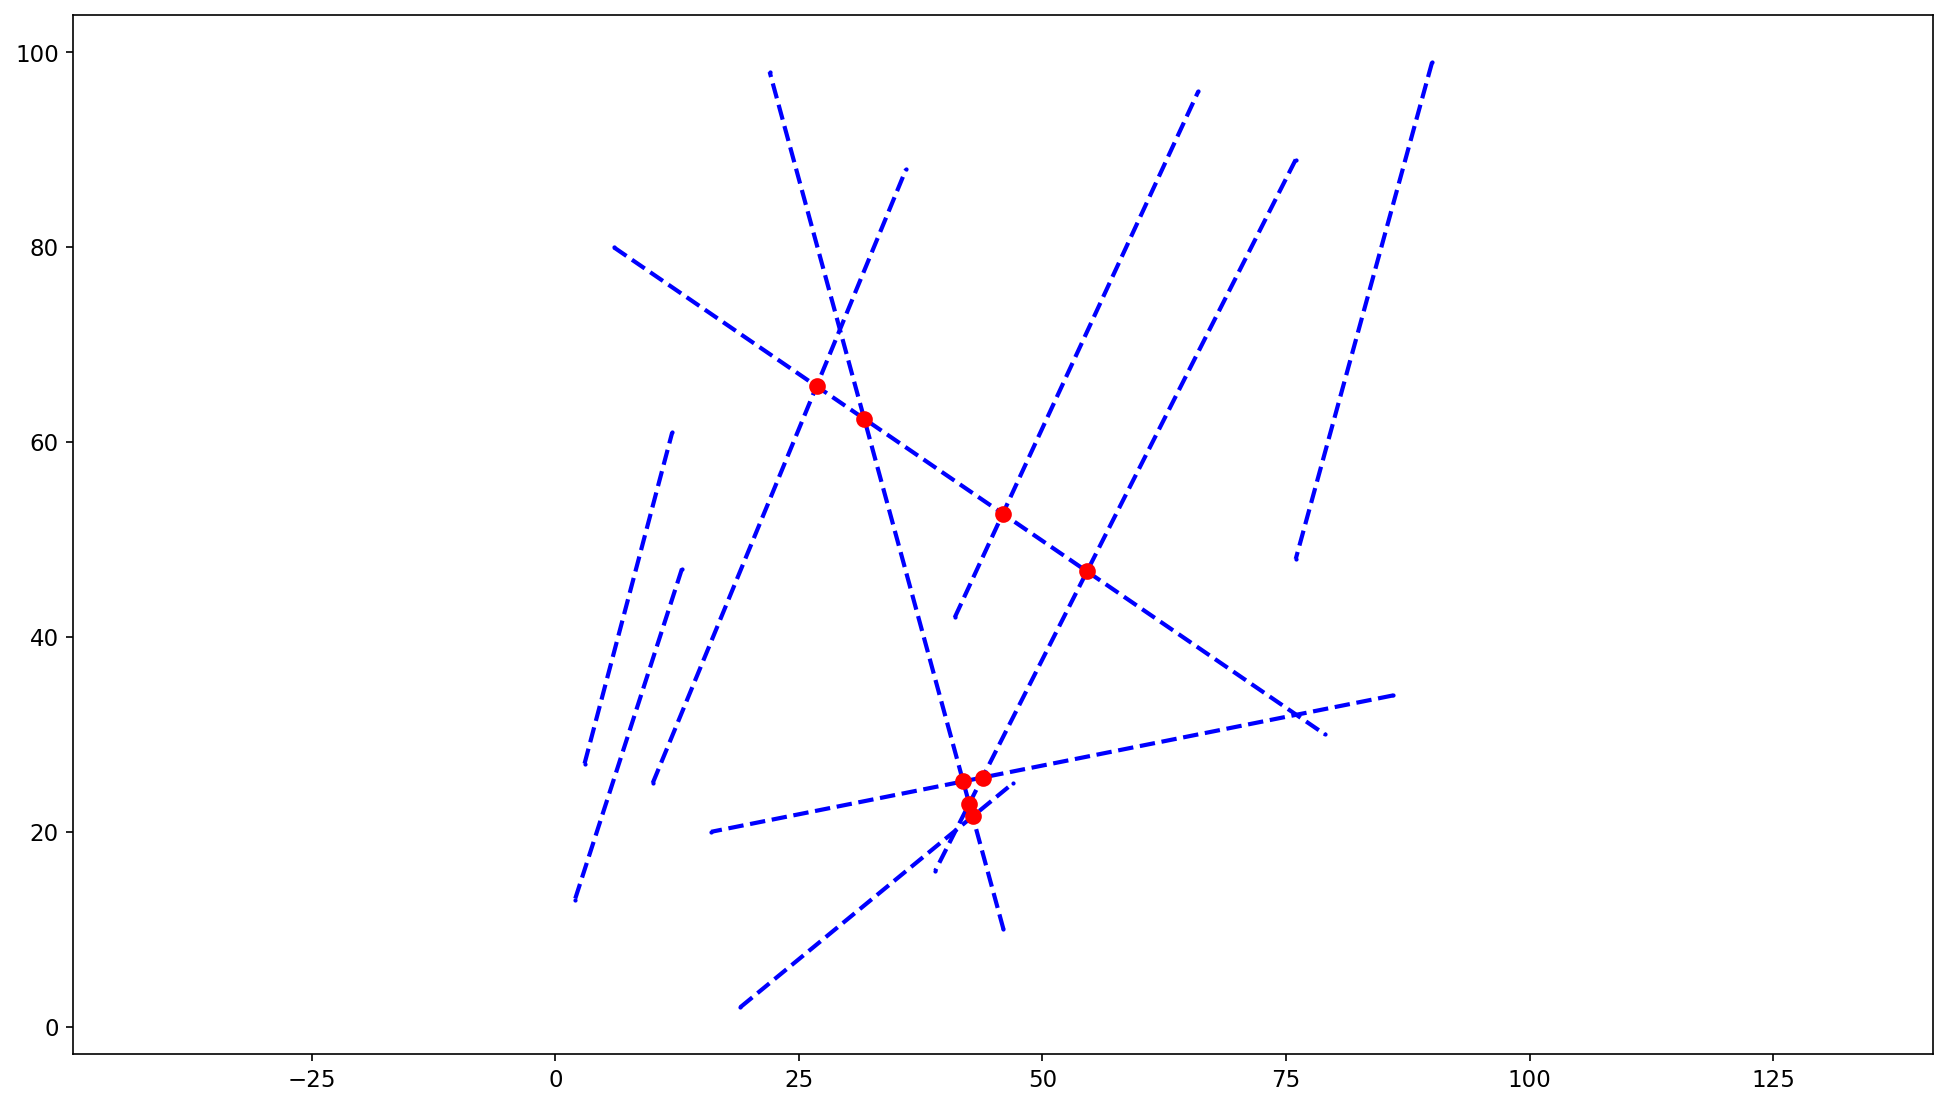

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.size"] = 11


def calculate_intersection(p1, p2, p3, p4):
    xdiff = (p1[0] - p2[0], p3[0] - p4[0])
    ydiff = (p1[1] - p2[1], p3[1] - p4[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None  # Lines are parallel

    d = (det(p1, p2), det(p3, p4))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y



def is_point_on_line_segment(point, p1, p2):
    # Calculate the minimum and maximum x and y coordinates of the line segment
    min_x = min(p1[0], p2[0])
    max_x = max(p1[0], p2[0])
    min_y = min(p1[1], p2[1])
    max_y = max(p1[1], p2[1])

    # Check if the point's coordinates lie within the line segment's range
    if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y:
        return True

    return False


def find_line_segment_intersections(lines):
    intersections = []
    active_lines = set()

    # Create a list of events containing line endpoints
    events = []
    for line_index, line in enumerate(lines):
        events.append(("left", line[0], line_index))
        events.append(("right", line[1], line_index))

    # Sort the events by x-coordinate
    events.sort(key=lambda event: event[1][0])

    # Process each event
    for event_type, point, line_index in events:
        if event_type == "left":
            # Add the line to the active set
            active_lines.add(line_index)

            # Check for intersections with other active lines
            for active_line in active_lines.copy():
                if active_line != line_index:
                    intersection = calculate_intersection(
                        lines[active_line][0], lines[active_line][1],
                        lines[line_index][0], lines[line_index][1]
                    )
                    if intersection is not None and is_point_on_line_segment(intersection, lines[active_line][0], lines[active_line][1]) and is_point_on_line_segment(intersection, lines[line_index][0], lines[line_index][1]):
                        intersections.append(intersection)
        else:
            # Remove the line from the active set
            active_lines.discard(line_index)

    return intersections


def save_points_and_lines(input_array):
    point = [[], []]
    coordinates = []
    for item in input_array:
        # Remove any leading/trailing whitespace and split the item by semicolon and newline
        coords = item.strip().split(';')
        # Split the point and line strings by space
        coords = [coords[0].split(), coords[1].split()]

        # Convert the point and line coordinates to integers and create coordinate lists
        for dots in range(len(coords)):
            coords[dots][0] = int(coords[dots][0])
            coords[dots][1] = int(coords[dots][1])

        # Add the point and line to their respective lists
        coordinates.append(coords)
    return coordinates


def draw_line_segments(lines):
    for line in lines:
        x = [line[0][0], line[1][0]]
        y = [line[0][1], line[1][1]]

        plt.plot(x, y, 'bo--', linewidth=2, markersize=1)


def draw_intersection_points(points, size):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    for IX, IY in zip(x, y):
        if (abs(IX) < size) and (abs(IY) < size):
            plt.plot(IX, IY, 'ro', markersize=7)


# Usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
point_array = save_points_and_lines(lines)

intersections = find_line_segment_intersections(point_array)

plot_size = 100

draw_line_segments(point_array)
draw_intersection_points(intersections, plot_size)

plt.axis('equal')
plt.show()



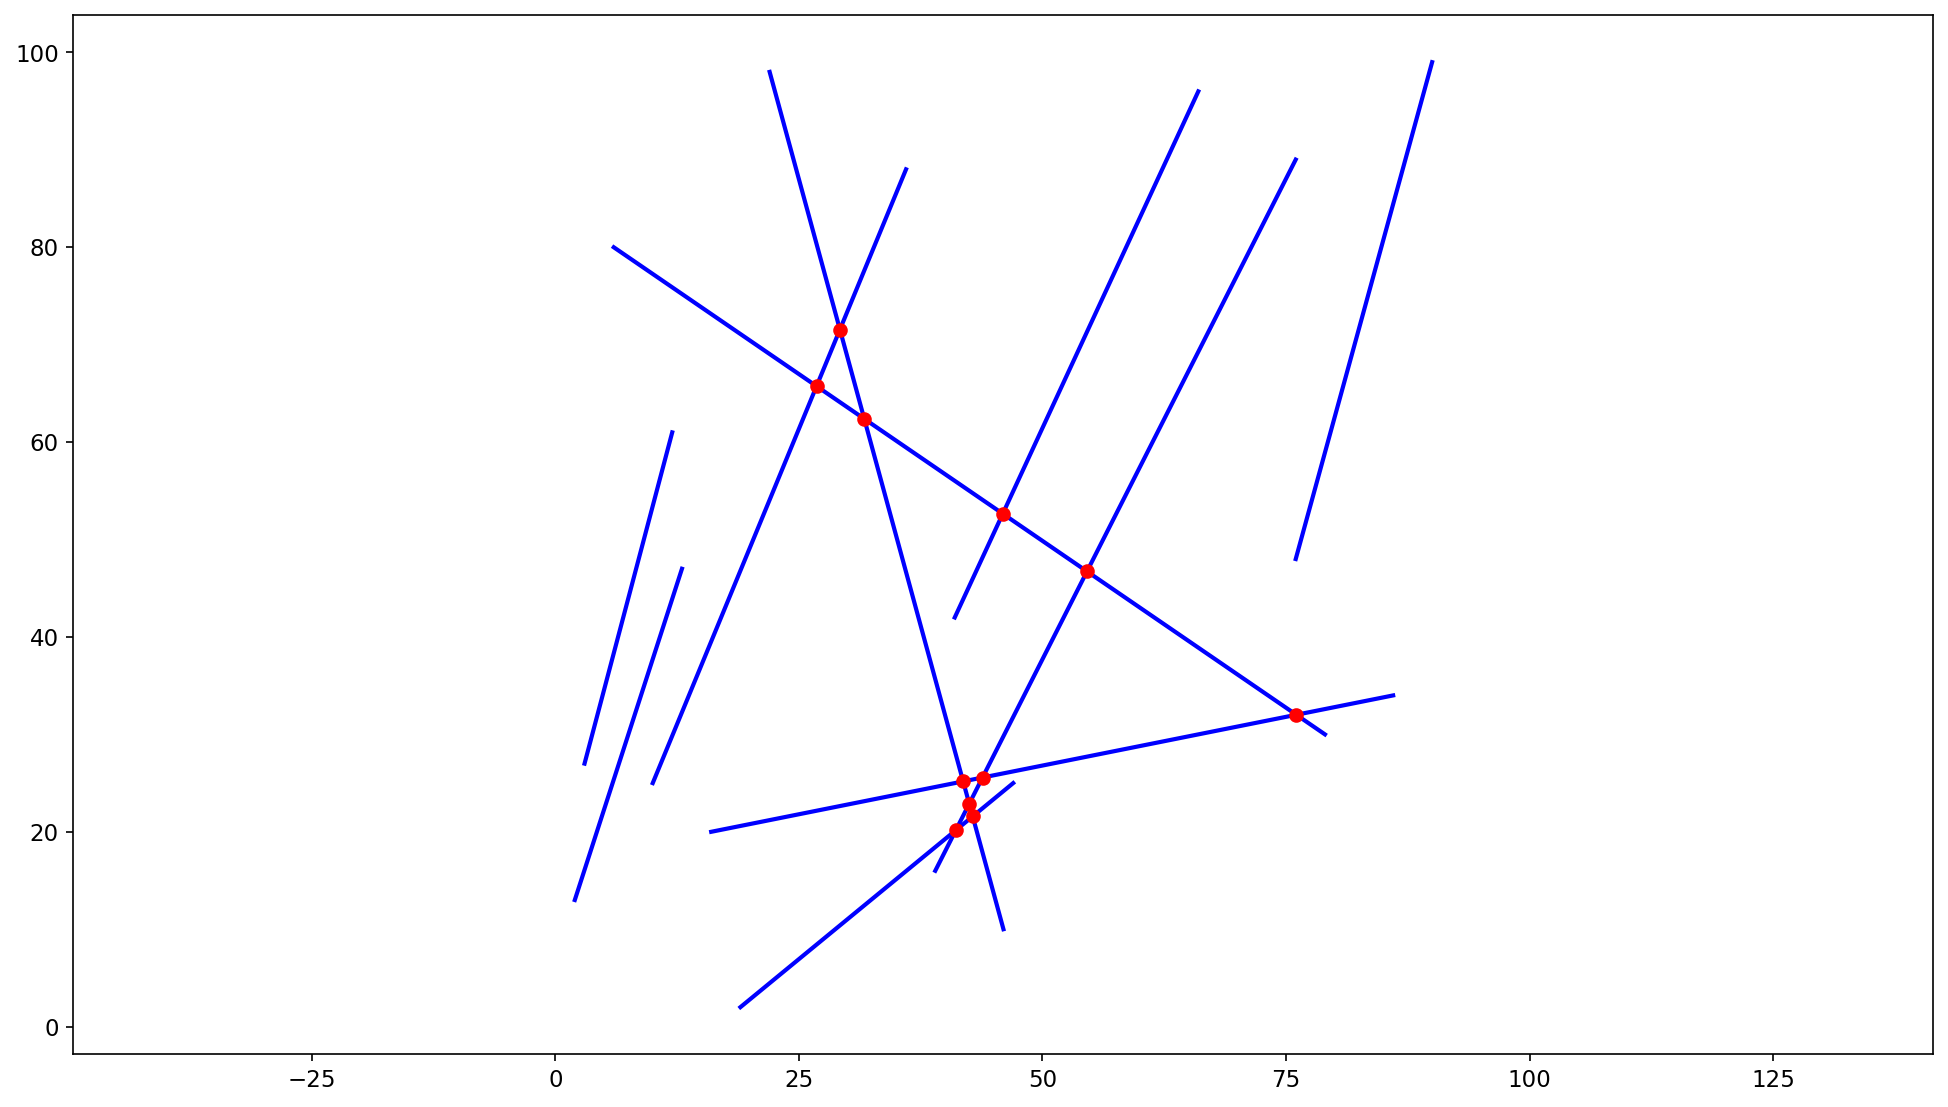

In [5]:
from sympy import Point, Segment
import matplotlib.pyplot as plt

def save_points_and_lines(input_array):
    line_segments = []
    for item in input_array:
        p1_str, p2_str = item.strip().split(';')
        p1 = tuple(map(int, p1_str.split()))
        p2 = tuple(map(int, p2_str.split()))
        line_segments.append((p1, p2))
    return line_segments

def find_line_segment_sypmy(line_segments):
    intersections = []
    for i in range(len(line_segments)):
        for j in range(i+1, len(line_segments)):
            seg1 = Segment(Point(*line_segments[i][0]), Point(*line_segments[i][1]))
            seg2 = Segment(Point(*line_segments[j][0]), Point(*line_segments[j][1]))
            intersection = seg1.intersection(seg2)
            if intersection:
                if isinstance(intersection, Point):
                    intersections.append((intersection.x, intersection.y))
                else:
                    for point in intersection:
                        intersections.append((point.x, point.y))
    return intersections

def draw_line_segments(line_segments):
    for segment in line_segments:
        p1, p2 = segment
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b', linewidth=2)

def draw_intersections(intersections):
    for intersection in intersections:
        plt.plot(intersection[0], intersection[1], 'ro')

        
def calculate_intersection(p1, p2, p3, p4):
    xdiff = (p1[0] - p2[0], p3[0] - p4[0])
    ydiff = (p1[1] - p2[1], p3[1] - p4[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None  # Lines are parallel

    d = (det(p1, p2), det(p3, p4))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y



def is_point_on_line_segment(point, p1, p2):
    # Calculate the minimum and maximum x and y coordinates of the line segment
    min_x = min(p1[0], p2[0])
    max_x = max(p1[0], p2[0])
    min_y = min(p1[1], p2[1])
    max_y = max(p1[1], p2[1])

    # Check if the point's coordinates lie within the line segment's range
    if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y:
        return True

    return False


def find_line_segment_intersections(lines):
    intersections = []
    active_lines = set()

    # Create a list of events containing line endpoints
    events = []
    for line_index, line in enumerate(lines):
        events.append(("left", line[0], line_index))
        events.append(("right", line[1], line_index))

    # Sort the events by x-coordinate
    events.sort(key=lambda event: event[1][0])

    # Process each event
    for event_type, point, line_index in events:
        if event_type == "left":
            # Add the line to the active set
            active_lines.add(line_index)

            # Check for intersections with other active lines
            for active_line in active_lines.copy():
                if active_line != line_index:
                    intersection = calculate_intersection(
                        lines[active_line][0], lines[active_line][1],
                        lines[line_index][0], lines[line_index][1]
                    )
                    if intersection is not None and is_point_on_line_segment(intersection, lines[active_line][0], lines[active_line][1]) and is_point_on_line_segment(intersection, lines[line_index][0], lines[line_index][1]):
                        intersections.append(intersection)
        else:
            # Remove the line from the active set
            active_lines.discard(line_index)

    return intersections


def save_points_and_lines(input_array):
    point = [[], []]
    coordinates = []
    for item in input_array:
        # Remove any leading/trailing whitespace and split the item by semicolon and newline
        coords = item.strip().split(';')
        # Split the point and line strings by space
        coords = [coords[0].split(), coords[1].split()]

        # Convert the point and line coordinates to integers and create coordinate lists
        for dots in range(len(coords)):
            coords[dots][0] = int(coords[dots][0])
            coords[dots][1] = int(coords[dots][1])

        # Add the point and line to their respective lists
        coordinates.append(coords)
    return coordinates

        
        

# Usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
line_segments = save_points_and_lines(lines)

intersections = find_line_segment_sypmy(line_segments)

# Draw the line segments and intersections
draw_line_segments(line_segments)
draw_intersections(intersections)

# Set plot properties
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (8, 6)
plt.axis('equal')

# Show the plot
plt.show()


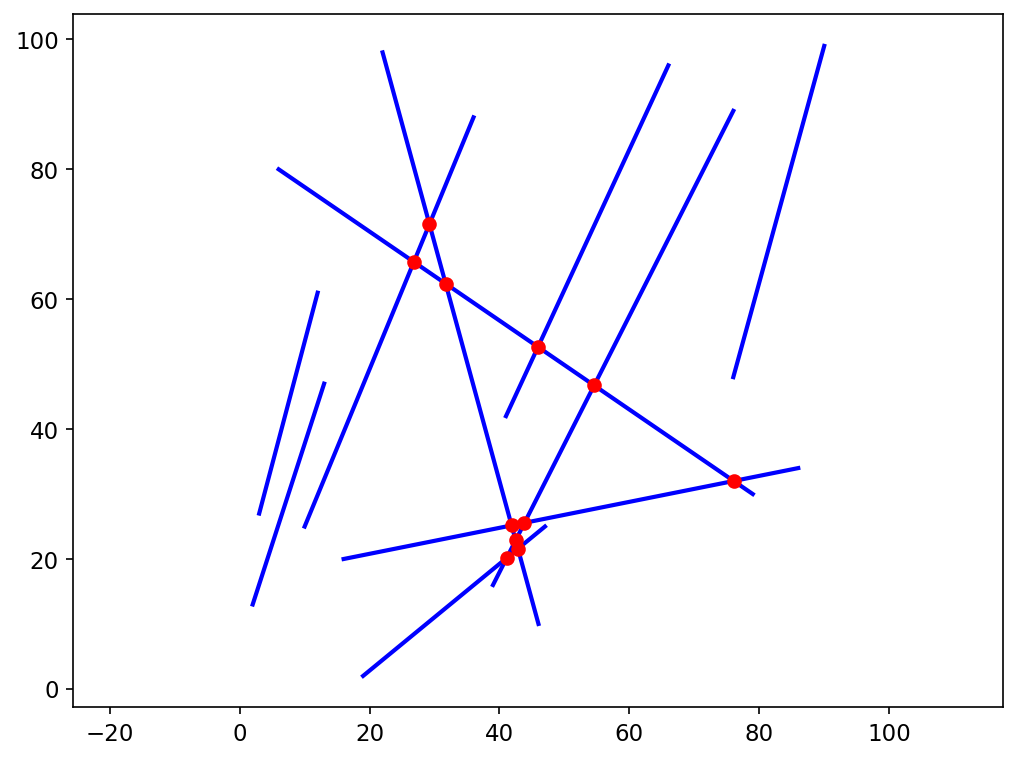

In [6]:
from sympy import Point, Segment
import matplotlib.pyplot as plt

def save_points_and_lines(input_array):
    line_segments = []
    for item in input_array:
        p1_str, p2_str = item.strip().split(';')
        p1 = tuple(map(int, p1_str.split()))
        p2 = tuple(map(int, p2_str.split()))
        line_segments.append((p1, p2))
    return line_segments

def find_line_segment_intersections(line_segments):
    intersections = []
    for i in range(len(line_segments)):
        for j in range(i+1, len(line_segments)):
            seg1 = Segment(Point(*line_segments[i][0]), Point(*line_segments[i][1]))
            seg2 = Segment(Point(*line_segments[j][0]), Point(*line_segments[j][1]))
            intersection = seg1.intersection(seg2)
            if intersection:
                if isinstance(intersection, Point):
                    intersections.append((intersection.x, intersection.y))
                else:
                    for point in intersection:
                        intersections.append((point.x, point.y))
    return intersections

def draw_line_segments(line_segments):
    for segment in line_segments:
        p1, p2 = segment
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b', linewidth=2)

def draw_intersections(intersections):
    for intersection in intersections:
        plt.plot(intersection[0], intersection[1], 'ro')

# Usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
line_segments = save_points_and_lines(lines)

intersections = find_line_segment_intersections(line_segments)

# Draw the line segments and intersections
draw_line_segments(line_segments)
draw_intersections(intersections)

# Set plot properties
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (8, 6)
plt.axis('equal')

# Show the plot
plt.show()


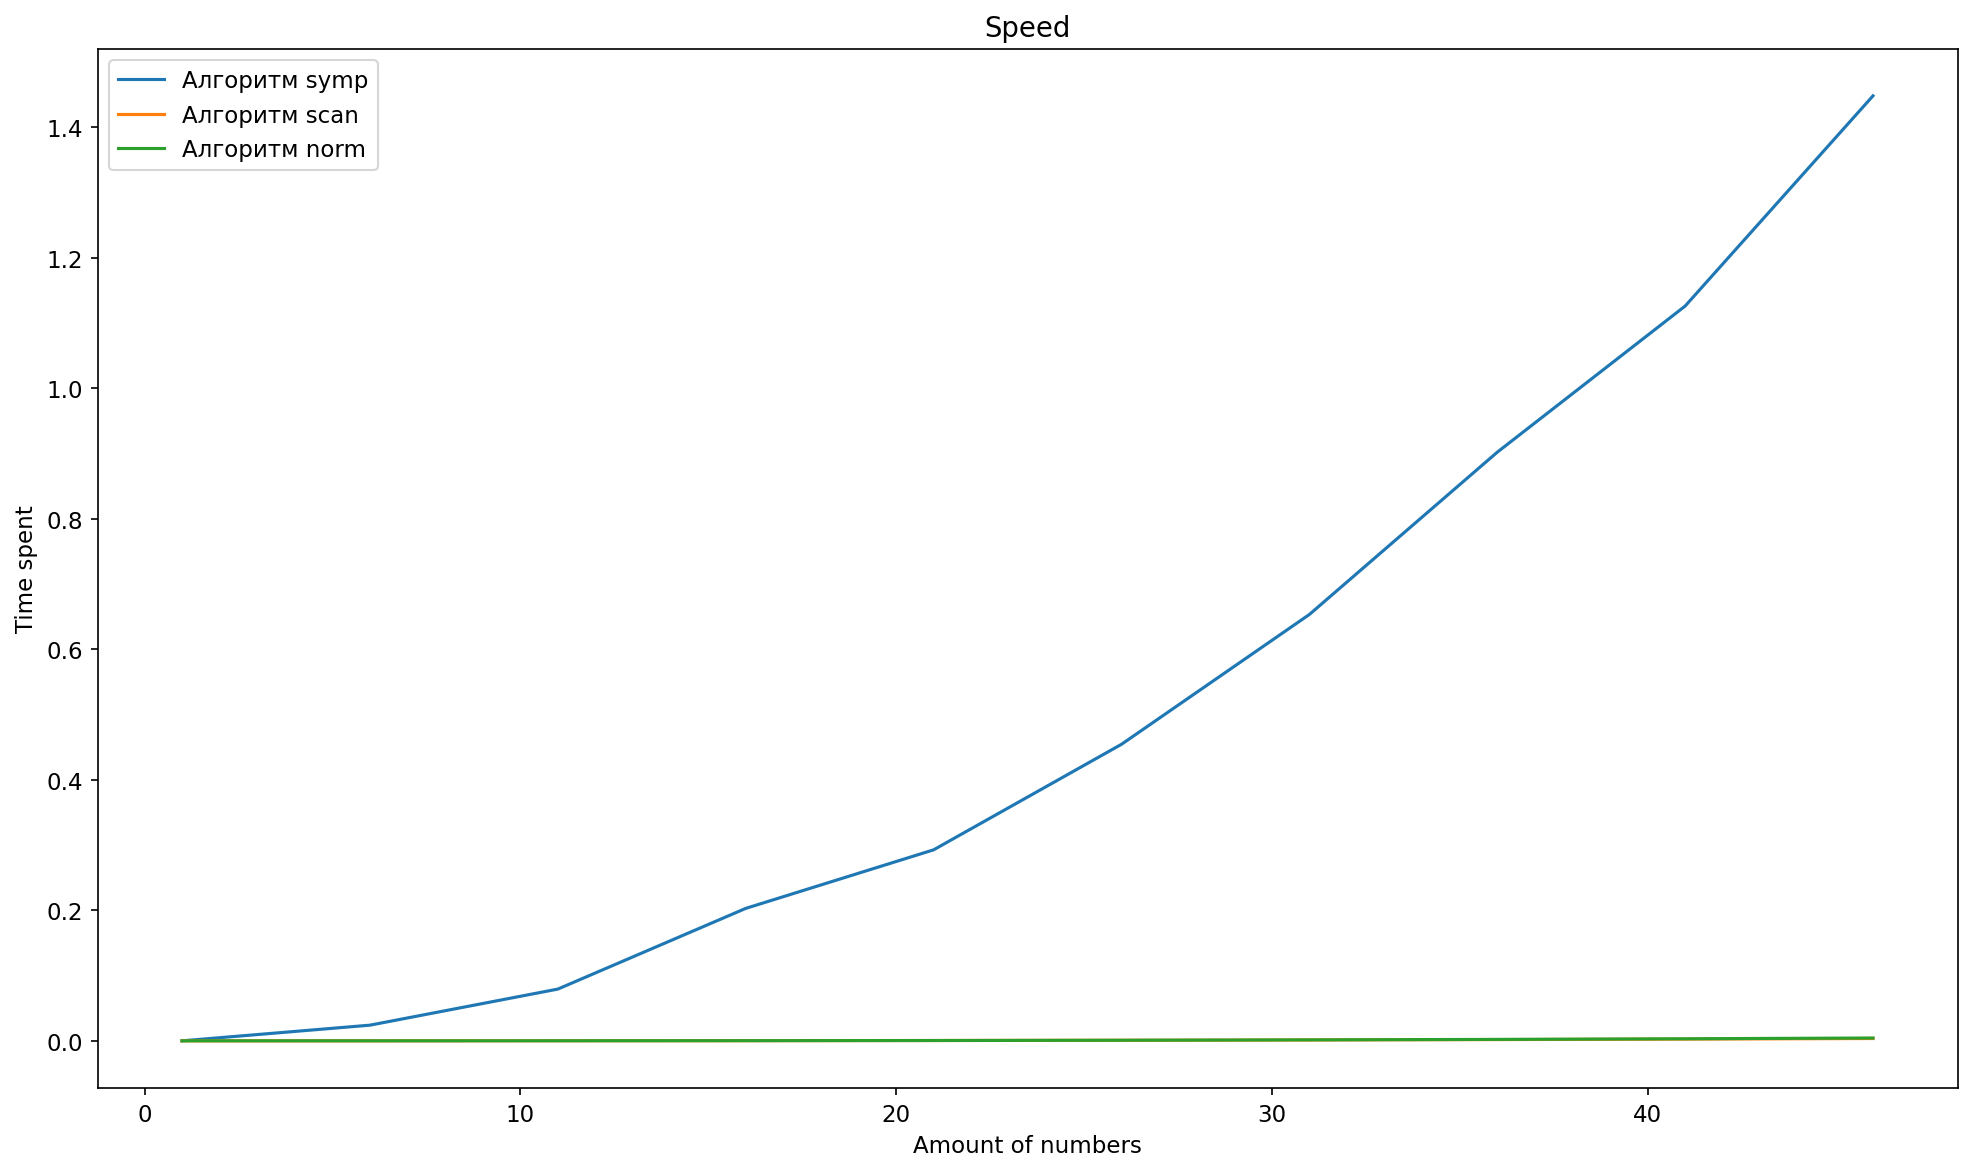

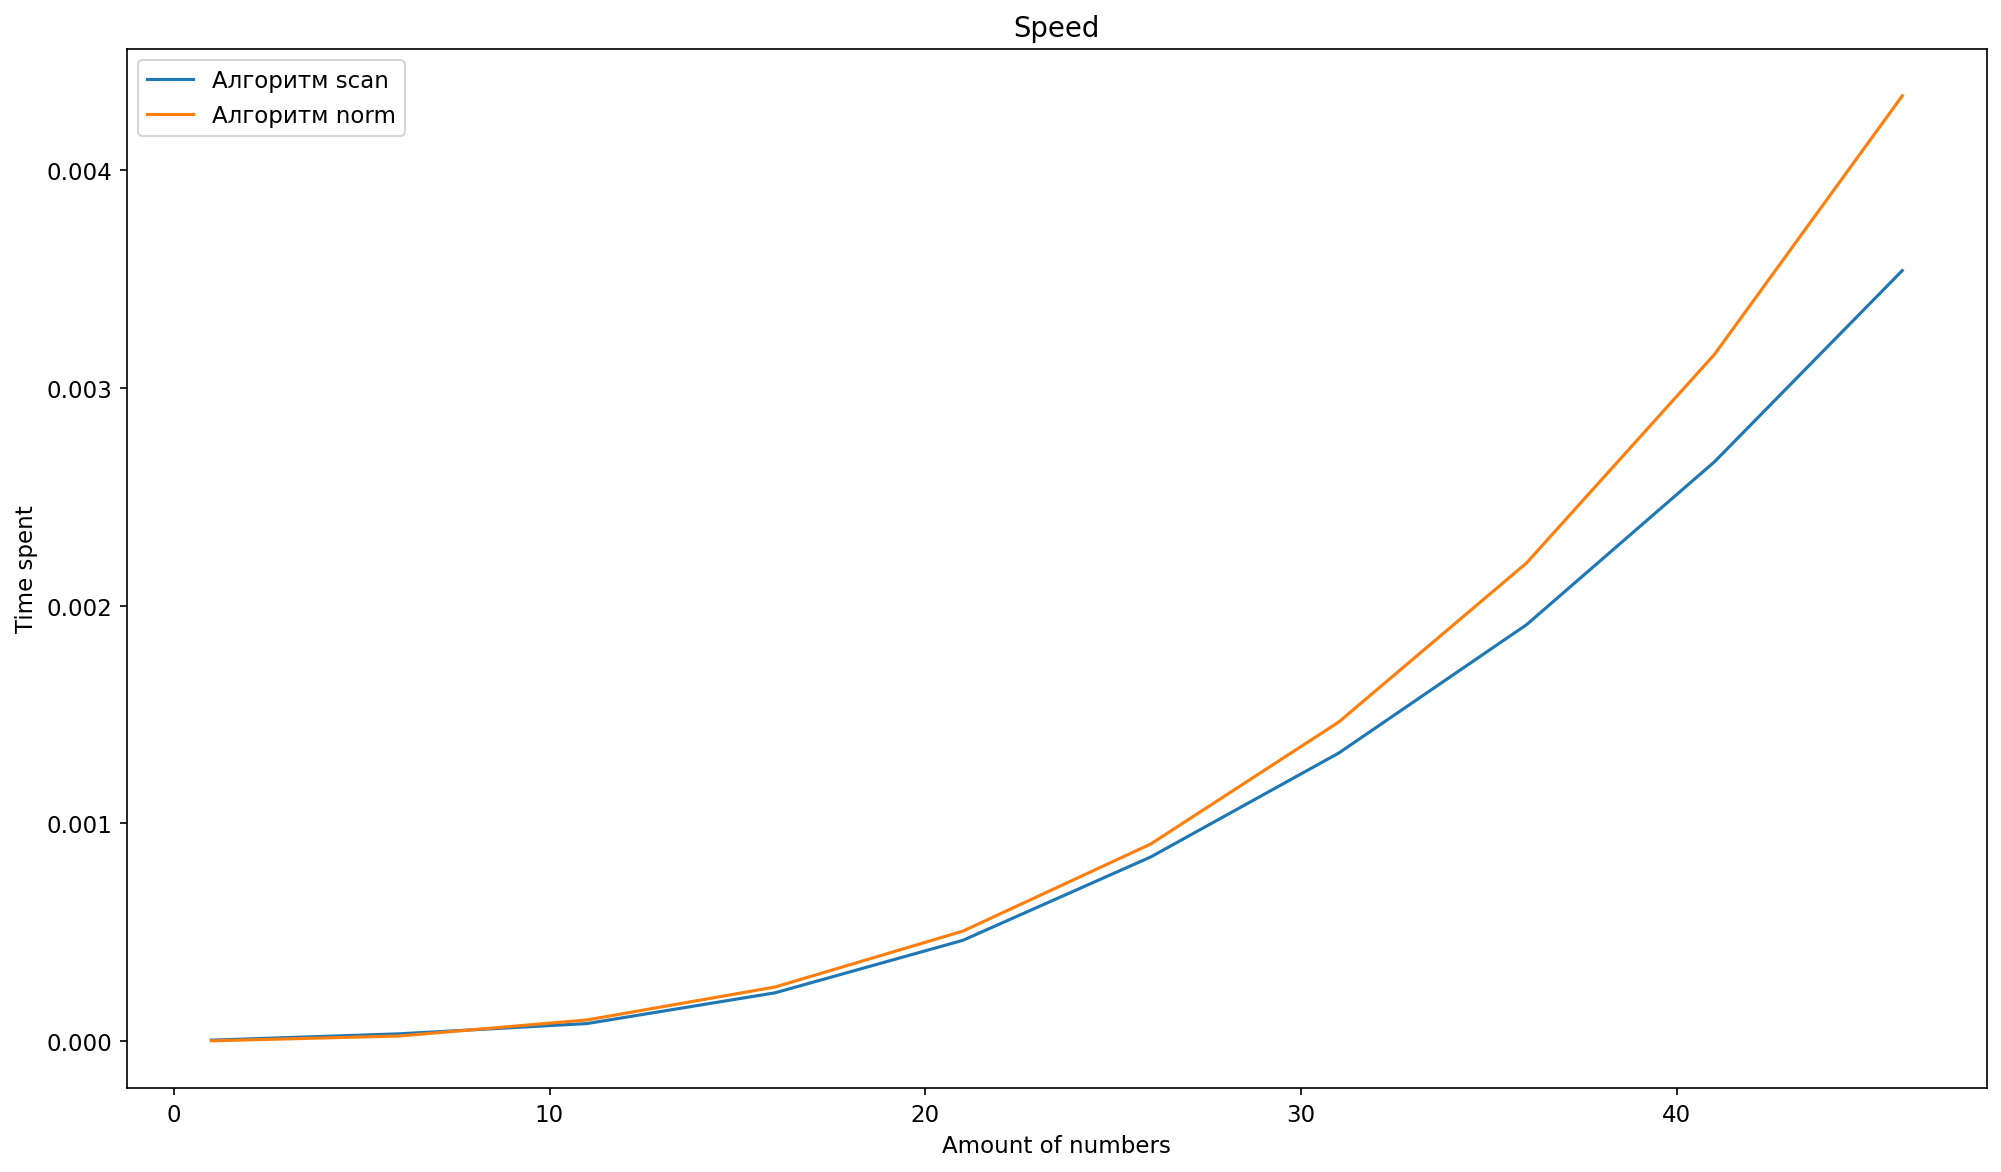

In [7]:
import random

from sympy import Point, Segment
import matplotlib.pyplot as plt


def save_points_and_lines(input_array):
    line_segments = []
    for item in input_array:
        p1_str, p2_str = item.strip().split(';')
        p1 = tuple(map(int, p1_str.split()))
        p2 = tuple(map(int, p2_str.split()))
        line_segments.append((p1, p2))
    return line_segments

def find_line_segment_sympy(line_segments):
    intersections = []
    timeout=0
    for i in range(len(line_segments)):
        for j in range(i+1, len(line_segments)):
            seg1 = Segment(Point(*line_segments[i][0]), Point(*line_segments[i][1]))
            seg2 = Segment(Point(*line_segments[j][0]), Point(*line_segments[j][1]))
            start_time-time.time()
            intersection = seg1.intersection(seg2)
            timeout=(time.time()-start_time)
            if intersection:
                if isinstance(intersection, Point):
                    intersections.append((intersection.x, intersection.y))
                else:
                    for point in intersection:
                        intersections.append((point.x, point.y))
    return intersections , timeout


def calculate_intersection(p1, p2, p3, p4):
    xdiff = (p1[0] - p2[0], p3[0] - p4[0])
    ydiff = (p1[1] - p2[1], p3[1] - p4[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None  # Lines are parallel

    d = (det(p1, p2), det(p3, p4))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y



def is_point_on_line_segment(point, p1, p2):
    # Calculate the minimum and maximum x and y coordinates of the line segment
    min_x = min(p1[0], p2[0])
    max_x = max(p1[0], p2[0])
    min_y = min(p1[1], p2[1])
    max_y = max(p1[1], p2[1])

    # Check if the point's coordinates lie within the line segment's range
    if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y:
        return True

    return False


def find_line_segment_scan(lines):
    intersections = []
    active_lines = set()

    # Create a list of events containing line endpoints
    events = []
    for line_index, line in enumerate(lines):
        events.append(("left", line[0], line_index))
        events.append(("right", line[1], line_index))

    # Sort the events by x-coordinate
    events.sort(key=lambda event: event[1][0])

    # Process each event
    for event_type, point, line_index in events:
        if event_type == "left":
            # Add the line to the active set
            active_lines.add(line_index)

            # Check for intersections with other active lines
            for active_line in active_lines.copy():
                if active_line != line_index:
                    intersection = calculate_intersection(
                        lines[active_line][0], lines[active_line][1],
                        lines[line_index][0], lines[line_index][1]
                    )
                    if intersection is not None and is_point_on_line_segment(intersection, lines[active_line][0], lines[active_line][1]) and is_point_on_line_segment(intersection, lines[line_index][0], lines[line_index][1]):
                        intersections.append(intersection)
        else:
            # Remove the line from the active set
            active_lines.discard(line_index)

    return intersections

def calculate_intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4

    # Calculate the determinant of the coefficient matrix
    determinant = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    # If the determinant is zero, the line segments are parallel and do not intersect
    if determinant == 0:
        return None

    # Calculate the intersection point coordinates
    intersection_x = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / determinant
    intersection_y = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / determinant

    return intersection_x, intersection_y

    
def find_line_segment_normal(lines):
    intersections = []
    
    # Iterate over each pair of line segments
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i]
            line2 = lines[j]
            
            # Get the coordinates of the line segment endpoints
            p1, p2 = line1[0], line1[1]
            p3, p4 = line2[0], line2[1]
            
            # Calculate the line segment intersection
            intersection = calculate_intersection(p1, p2, p3, p4)
            
            # If an intersection is found and both line segments contain the intersection point,
            # add it to the intersections list
            if intersection is not None and is_point_on_line_segment(intersection, p1, p2) and is_point_on_line_segment(intersection, p3, p4):
                intersections.append(intersection)
    
    return intersections


def is_point_on_line_segment(point, p1, p2):
    # Calculate the minimum and maximum x and y coordinates of the line segment
    min_x = min(p1[0], p2[0])
    max_x = max(p1[0], p2[0])
    min_y = min(p1[1], p2[1])
    max_y = max(p1[1], p2[1])
    
    # Check if the point's coordinates lie within the line segment's range
    if min_x <= point[0] <= max_x and min_y <= point[1] <= max_y:
        return True
    
    return False


def generate_random_segments(num_segments):
    segments = []
    for _ in range(num_segments):
        x1, y1 = random.randint(0, 100), random.randint(0, 100)
        x2, y2 = random.randint(0, 100), random.randint(0, 100)
        segment = ((x1, y1), (x2, y2))
        segments.append(segment)
    return segments



timesym=[]
timescan=[]
timenorm=[]
times=0
timesc=0
timen=0
x=[]

repeats=1

# sizes=[10,20,50,100,200]
sizes=range(1,50,5)
for i in sizes:
    timeg=0
    timea=0
    times=0
    for j in range(repeats):
        segments=generate_random_segments(i)
        
        
#         start_time=time.time()
        times+=find_line_segment_sympy(segments)[1]
#         times+=time.time()-start_time
#         print(times)

        start_time=time.time()
        find_line_segment_scan(segments)
        timesc+=time.time()-start_time

        start_time=time.time()
        find_line_segment_normal(segments)
        timen+=time.time()-start_time
        
    timesym.append  (times/repeats)
    timescan.append (timesc/repeats)
    timenorm.append (timen/repeats)
    
    x.append(i)
    
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11
    
plt.plot(x, timesym,   label = 'Алгоритм symp')
plt.plot(x, timescan, label = 'Алгоритм scan')
plt.plot(x, timenorm,  label = 'Алгоритм norm')

plt.xlabel('Amount of numbers')
plt.ylabel('Time spent')
plt.title ('Speed')

plt.legend()
plt.show()

plt.close()


plt.plot(x, timescan, label = 'Алгоритм scan')
plt.plot(x, timenorm,  label = 'Алгоритм norm')
plt.xlabel('Amount of numbers')
plt.ylabel('Time spent')
plt.title ('Speed')
plt.legend()

plt.show()

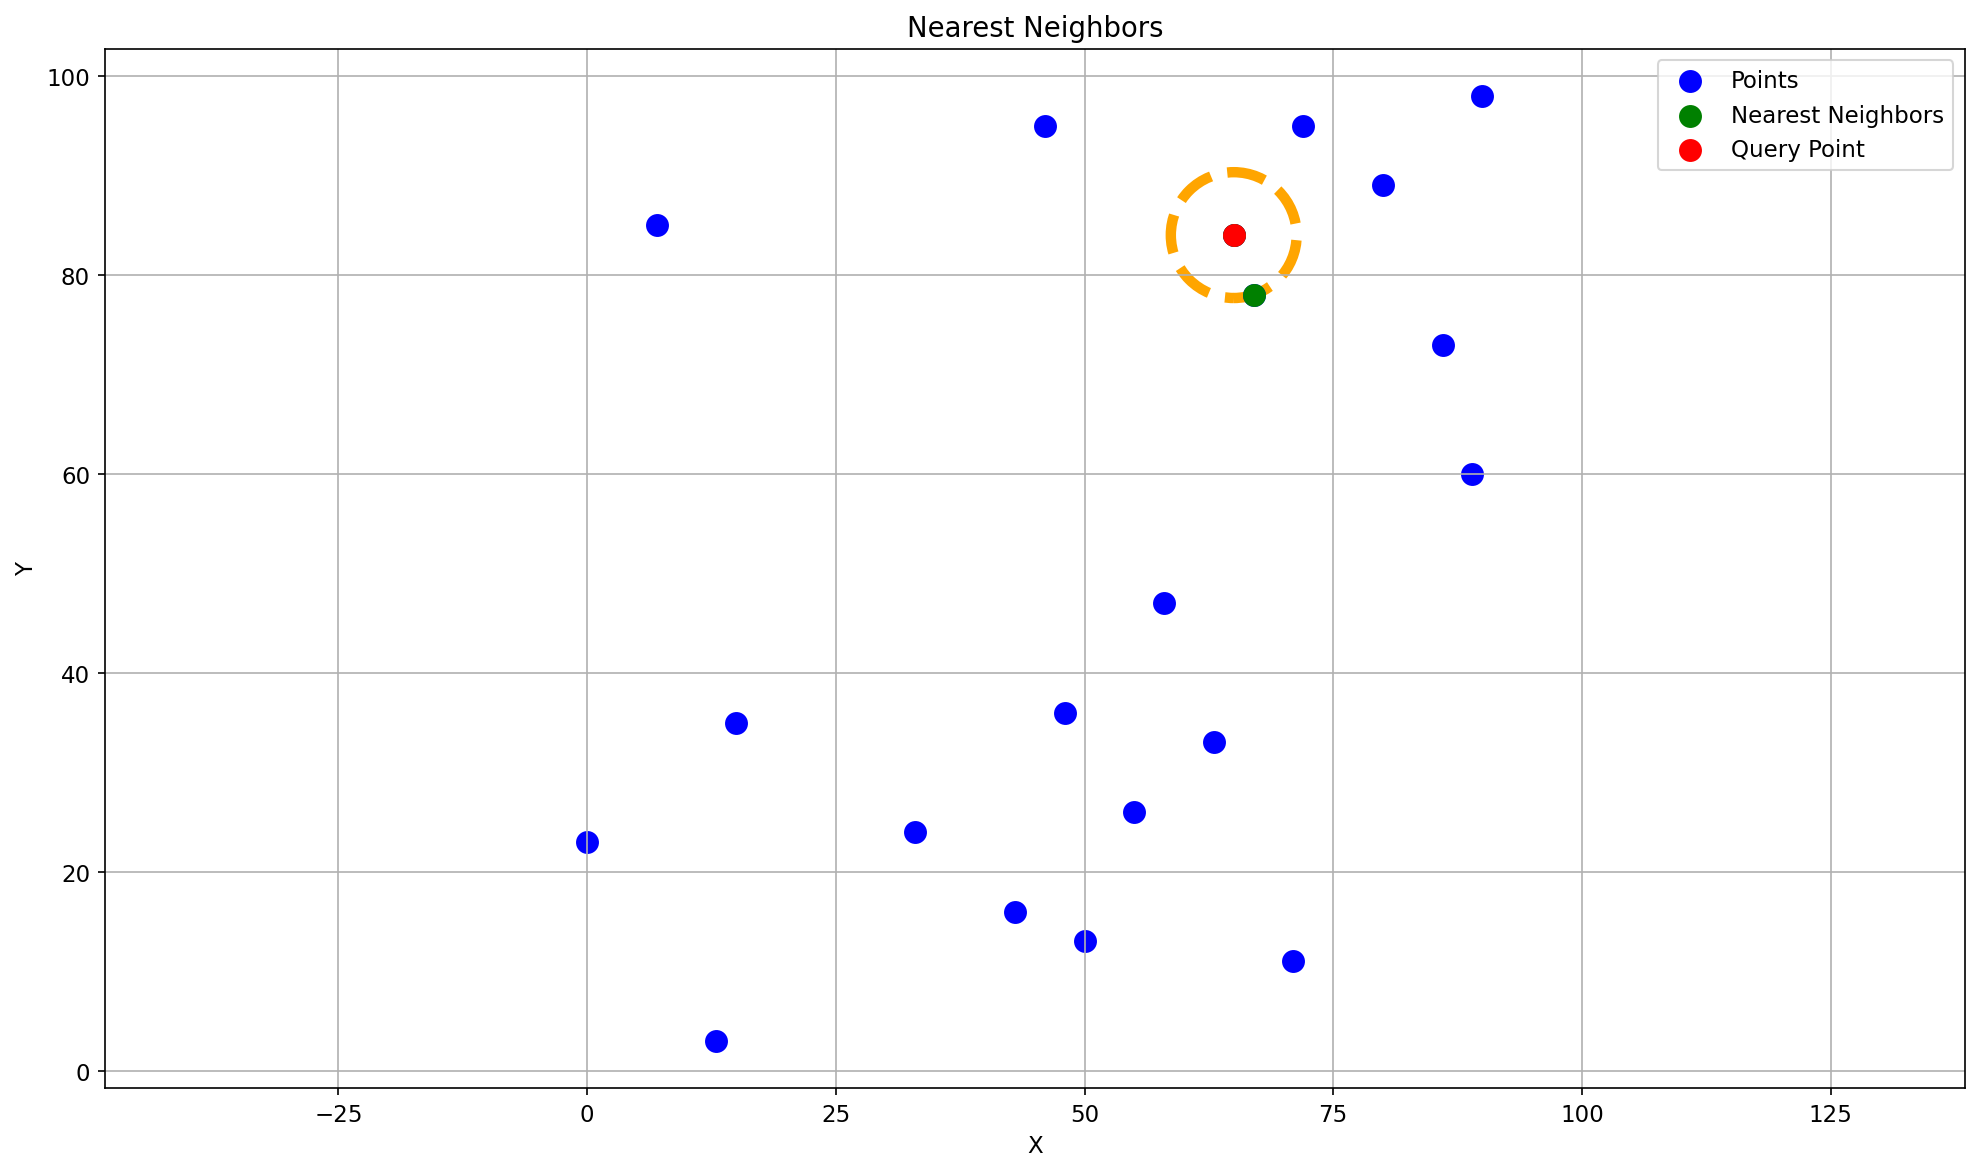

In [8]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def convert_lines_to_coordinates(lines):
    coordinates = []
    for line in lines:
        # Remove any leading/trailing whitespace and split the line by space
        values = line.strip().split(' ')
        
        # Convert the values to integers and create a coordinate list
        coordinate = [int(value) for value in values]
        
        # Add the coordinate to the list
        coordinates.append(coordinate)
    
    return coordinates

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def find_nearest_neighbors(points, query_point, k):
    distances = []
    for point in points:
        distance = euclidean_distance(point, query_point)
        distances.append((point, distance))
    
    distances.sort(key=lambda x: x[1])  # Sort the distances in ascending order
    
    neighbors = [distance[0] for distance in distances[:k]]  # Get the k nearest neighbors
    max_distance = distances[k-1][1] if len(distances) >= k else 0  # Distance to the furthest neighbor
    
    return neighbors, max_distance

def draw_points(points, query_point, neighbors, radius):
    xs = [point[0] for point in points]
    ys = [point[1] for point in points]
    
    fig, ax = plt.subplots()
    
    circle = Circle(query_point, radius, color='orange', fill=False, linestyle='dashed', lw=5)
    ax.add_artist(circle)
    
    ax.scatter(xs, ys, color='blue', label='Points', s=100)
    ax.scatter([point[0] for point in neighbors], [point[1] for point in neighbors],
               color='green', label='Nearest Neighbors', s=100)
    ax.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
    
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nearest Neighbors')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


# Example usage
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randPoints/2", "r")
points = convert_lines_to_coordinates(file.readlines())
file.close()
query_point = points[0]
k = 2

nearest_neighbors, max_distance = find_nearest_neighbors(points, query_point, k)
draw_points(points, query_point, nearest_neighbors, max_distance)


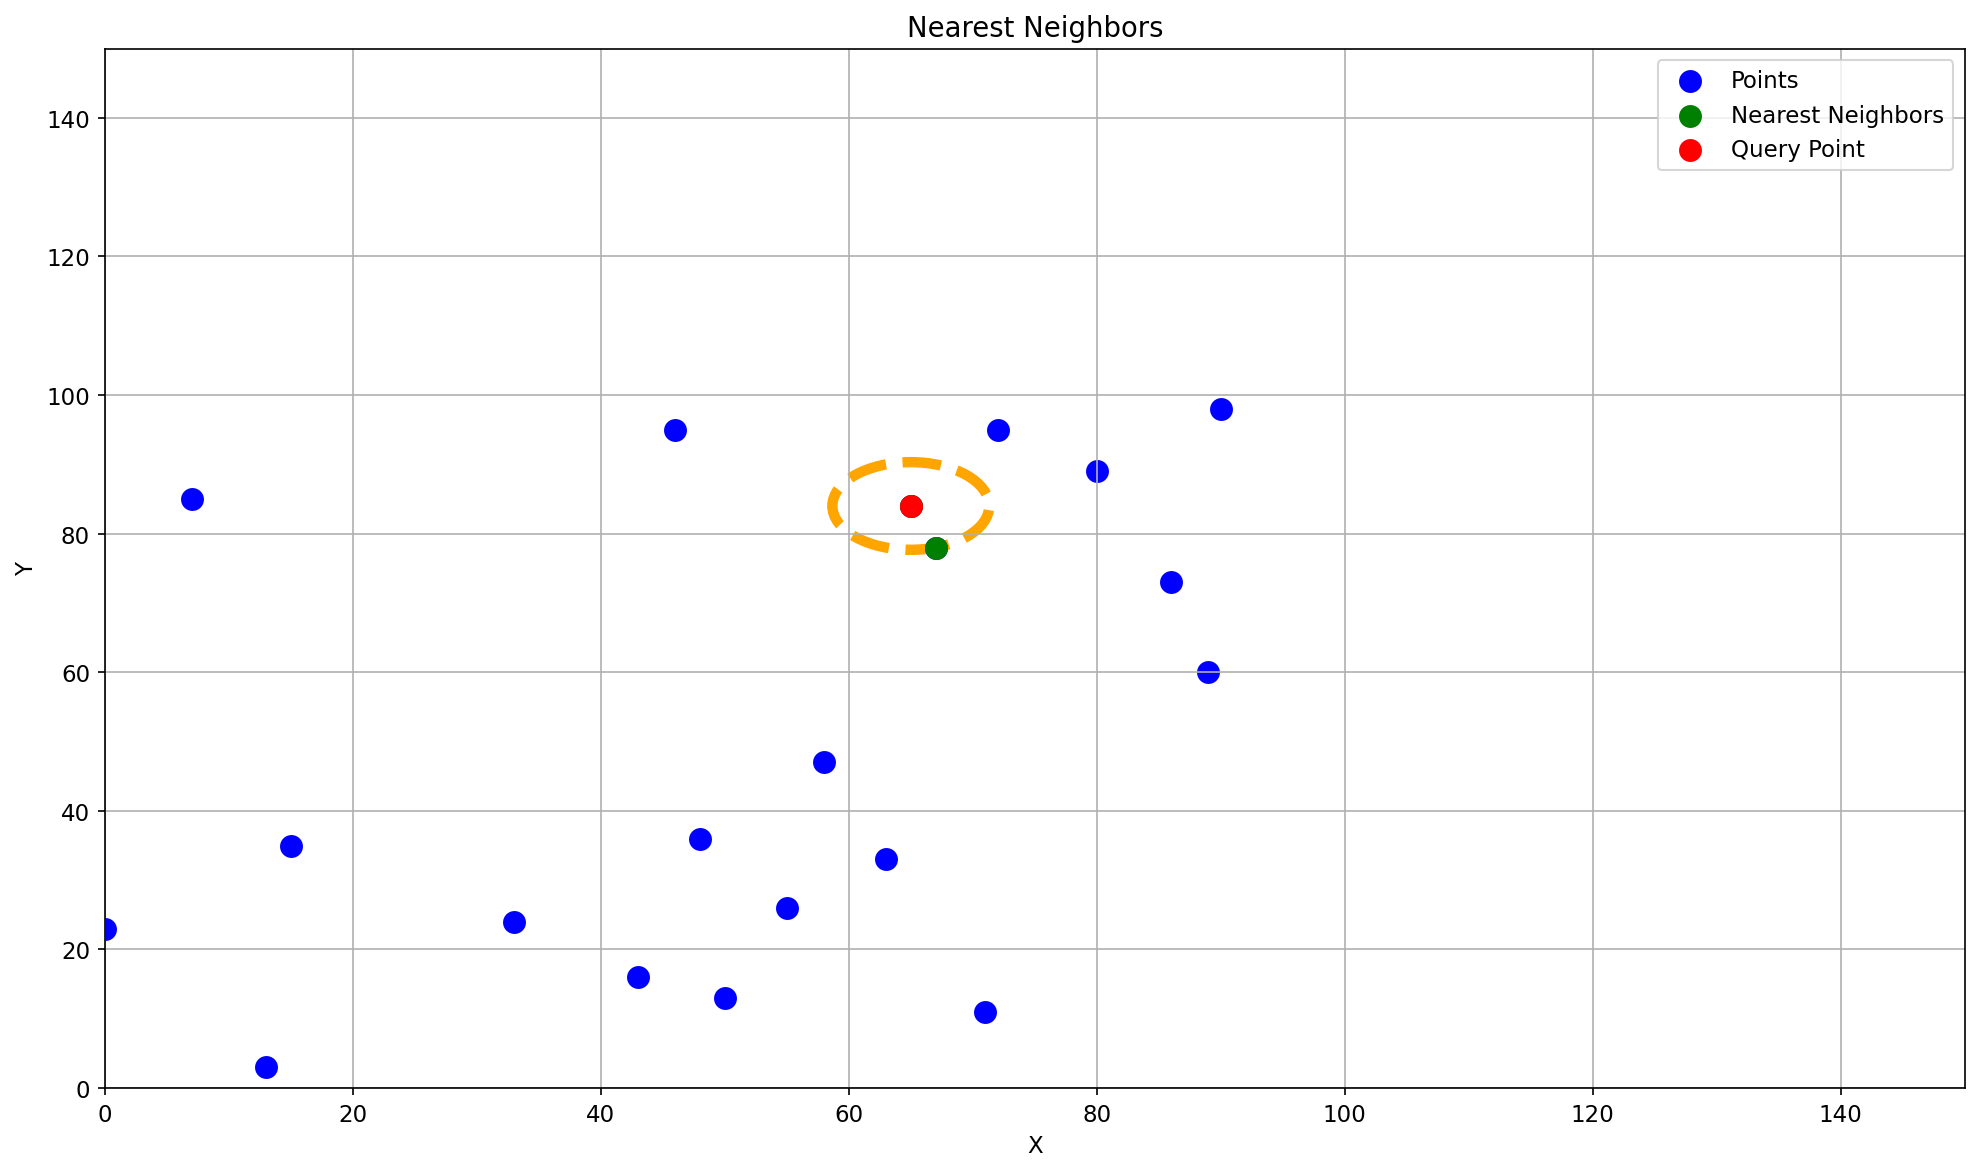

In [9]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def convert_lines_to_coordinates(lines):
    coordinates = []
    for line in lines:
        # Remove any leading/trailing whitespace and split the line by space
        values = line.strip().split(' ')
        
        # Convert the values to integers and create a coordinate list
        coordinate = [int(value) for value in values]
        
        # Add the coordinate to the list
        coordinates.append(coordinate)
    
    return coordinates

class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

class KDTree:
    def __init__(self, points):
        self.root = self.build_kdtree(points)

    def build_kdtree(self, points, depth=0):
        if not points:
            return None
        
        axis = depth % 2
        points.sort(key=lambda x: x[axis])
        median = len(points) // 2

        return Node(points[median],
                    self.build_kdtree(points[:median], depth + 1),
                    self.build_kdtree(points[median + 1:], depth + 1))

    def find_nearest_neighbors(self, query_point, k=1):
        self.nearest_neighbors = []
        self.closest_distances = [float('inf')] * k
        self._find_nearest_neighbors_helper(self.root, query_point, 0, k)
        
        return self.nearest_neighbors, max(self.closest_distances)
    
    def _find_nearest_neighbors_helper(self, node, query_point, depth, k):
        if node is None:
            return
        
        distance = self.euclidean_distance(node.point, query_point)
        if distance < self.closest_distances[0]:
            self._update_nearest_neighbors(node.point, distance, k)
        
        axis = depth % 2
        if query_point[axis] < node.point[axis]:
            self._find_nearest_neighbors_helper(node.left, query_point, depth + 1, k)
        else:
            self._find_nearest_neighbors_helper(node.right, query_point, depth + 1, k)
            
        if abs(query_point[axis] - node.point[axis]) < self.closest_distances[0]:
            if query_point[axis] < node.point[axis]:
                self._find_nearest_neighbors_helper(node.right, query_point, depth + 1, k)
            else:
                self._find_nearest_neighbors_helper(node.left, query_point, depth + 1, k)

    def _update_nearest_neighbors(self, point, distance, k):
        self.nearest_neighbors.append(point)
        self.nearest_neighbors = sorted(self.nearest_neighbors, key=lambda x: self.euclidean_distance(x, query_point))
        self.nearest_neighbors = self.nearest_neighbors[:k]
        self.closest_distances = [self.euclidean_distance(x, query_point) for x in self.nearest_neighbors]

    @staticmethod
    def euclidean_distance(point1, point2):
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def draw_points(points, query_point, neighbors, radius):
    xs = [point[0] for point in points]
    ys = [point[1] for point in points]

    fig, ax = plt.subplots()
    circle = Circle(query_point, radius, color='orange', fill=False, linestyle='dashed', lw=5)
    ax.add_artist(circle)
    ax.scatter(xs, ys, color='blue', label='Points', s=100)
    ax.scatter([point[0] for point in neighbors], [point[1] for point in neighbors],
               color='green', label='Nearest Neighbors', s=100)
    ax.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)


    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nearest Neighbors')
    plt.legend()
    plt.grid(True)
    plt.axis
    plt.xlim([0,150])
    plt.ylim([0,150])
    
# Example usage
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randPoints/2", "r")
points = convert_lines_to_coordinates(file.readlines())
file.close()
query_point = points[0]
k=2

kdtree = KDTree(points)
nearest_neighbors, max_distance = kdtree.find_nearest_neighbors(query_point, k)
draw_points(points, query_point, nearest_neighbors, max_distance)



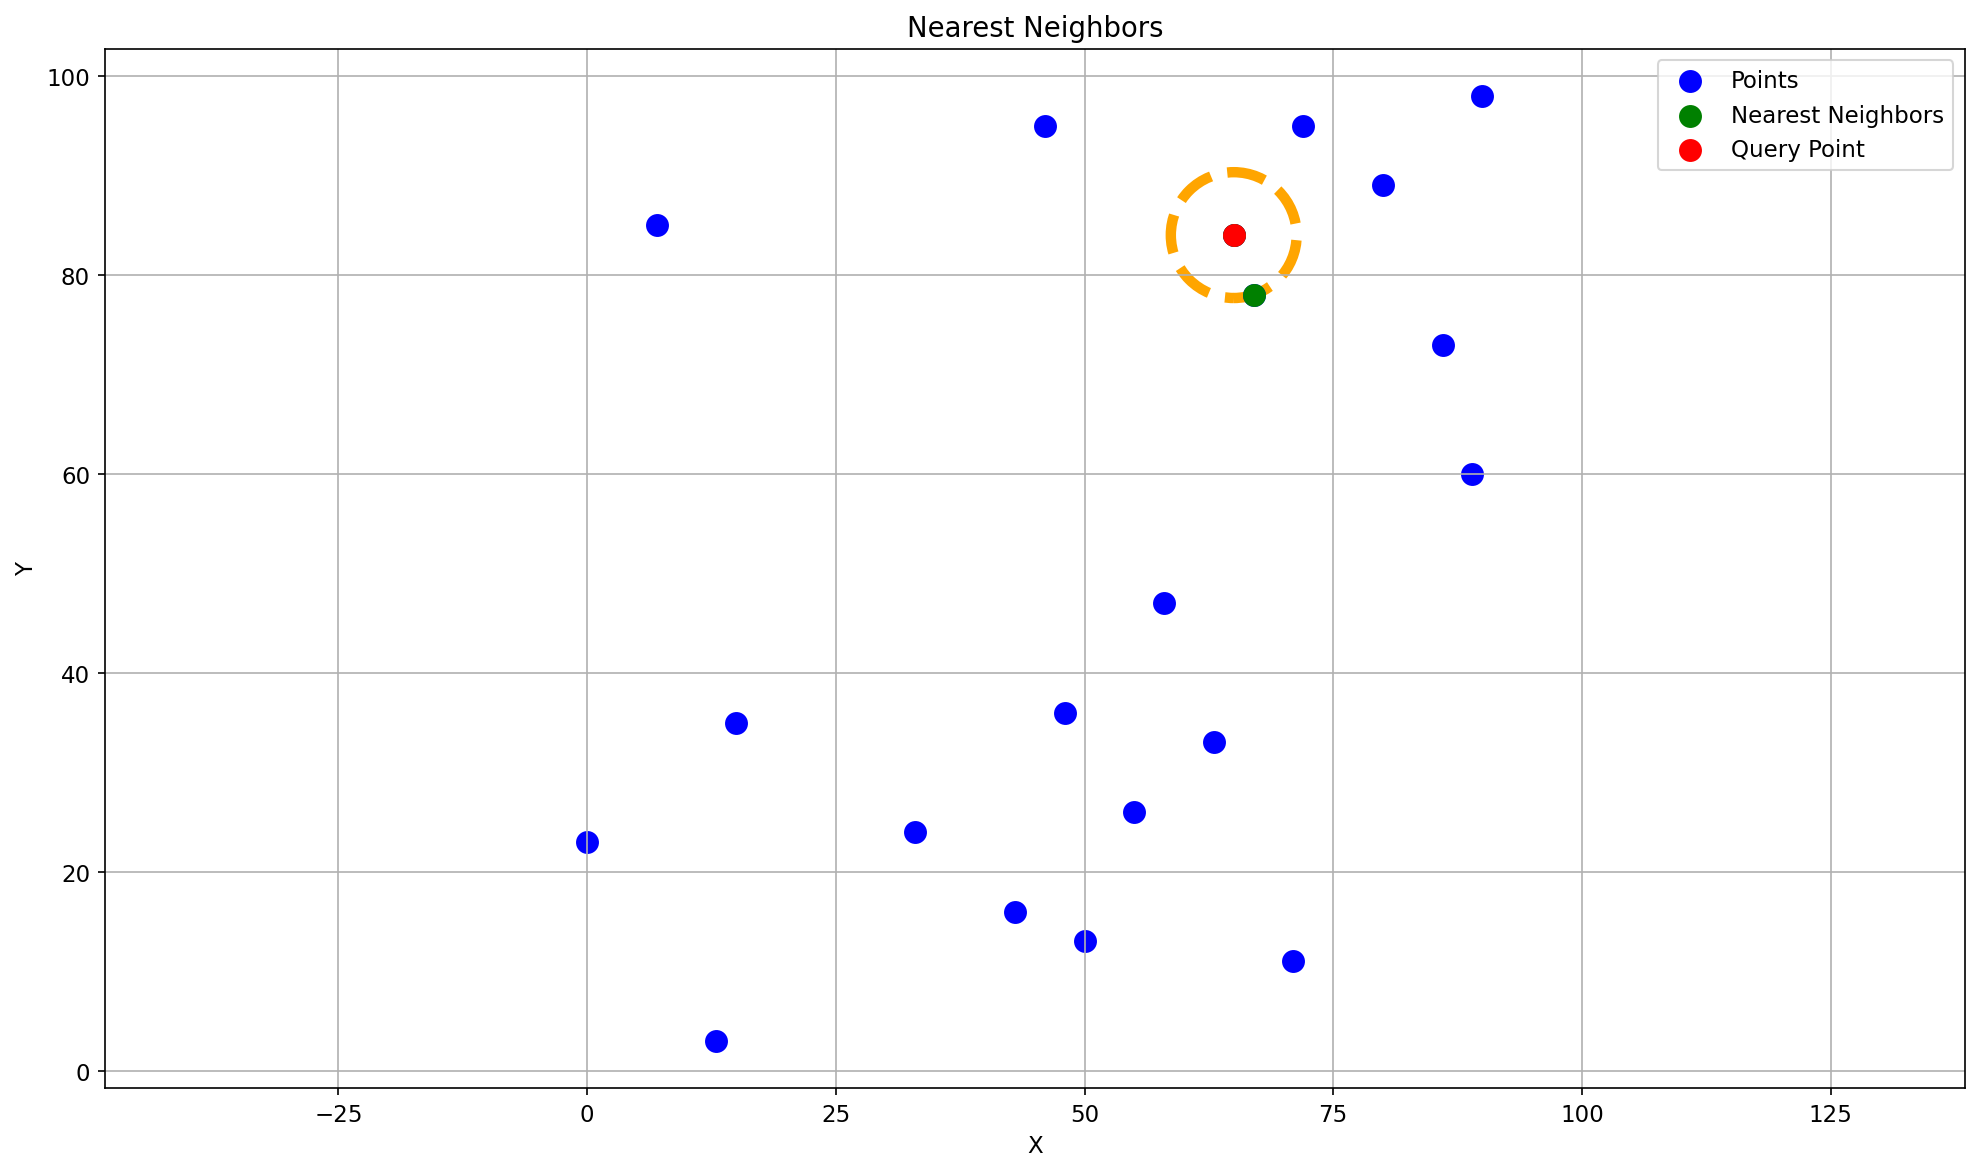

In [10]:
import math
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from matplotlib.patches import Circle

def convert_lines_to_coordinates(lines):
    coordinates = []
    for line in lines:
        # Remove any leading/trailing whitespace and split the line by space
        values = line.strip().split(' ')
        
        # Convert the values to integers and create a coordinate list
        coordinate = [int(value) for value in values]
        
        # Add the coordinate to the list
        coordinates.append(coordinate)
    
    return coordinates

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def find_nearest_neighbors(points, query_point, k=1):
    tree = KDTree(points)
    distances, indices = tree.query([query_point], k=k)
    neighbors = [points[i] for i in indices[0]]
    
    return neighbors, distances[0][-1]  # Return the nearest neighbors and the maximum distance

def draw_points(points, query_point, neighbors, radius):
    xs = [point[0] for point in points]
    ys = [point[1] for point in points]
    
    fig, ax = plt.subplots()
    circle = Circle(query_point, radius, color='orange', fill=False, linestyle='dashed', lw=5)
    ax.add_artist(circle)
    ax.scatter(xs, ys, color='blue', label='Points', s=100)
    ax.scatter([point[0] for point in neighbors], [point[1] for point in neighbors],
               color='green', label='Nearest Neighbors', s=100)
    ax.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nearest Neighbors')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randPoints/2", "r")
points = convert_lines_to_coordinates(file.readlines())
file.close()
query_point = points[0]
k=2

nearest_neighbors, max_distance = find_nearest_neighbors(points, query_point, k)
draw_points(points, query_point, nearest_neighbors, max_distance)


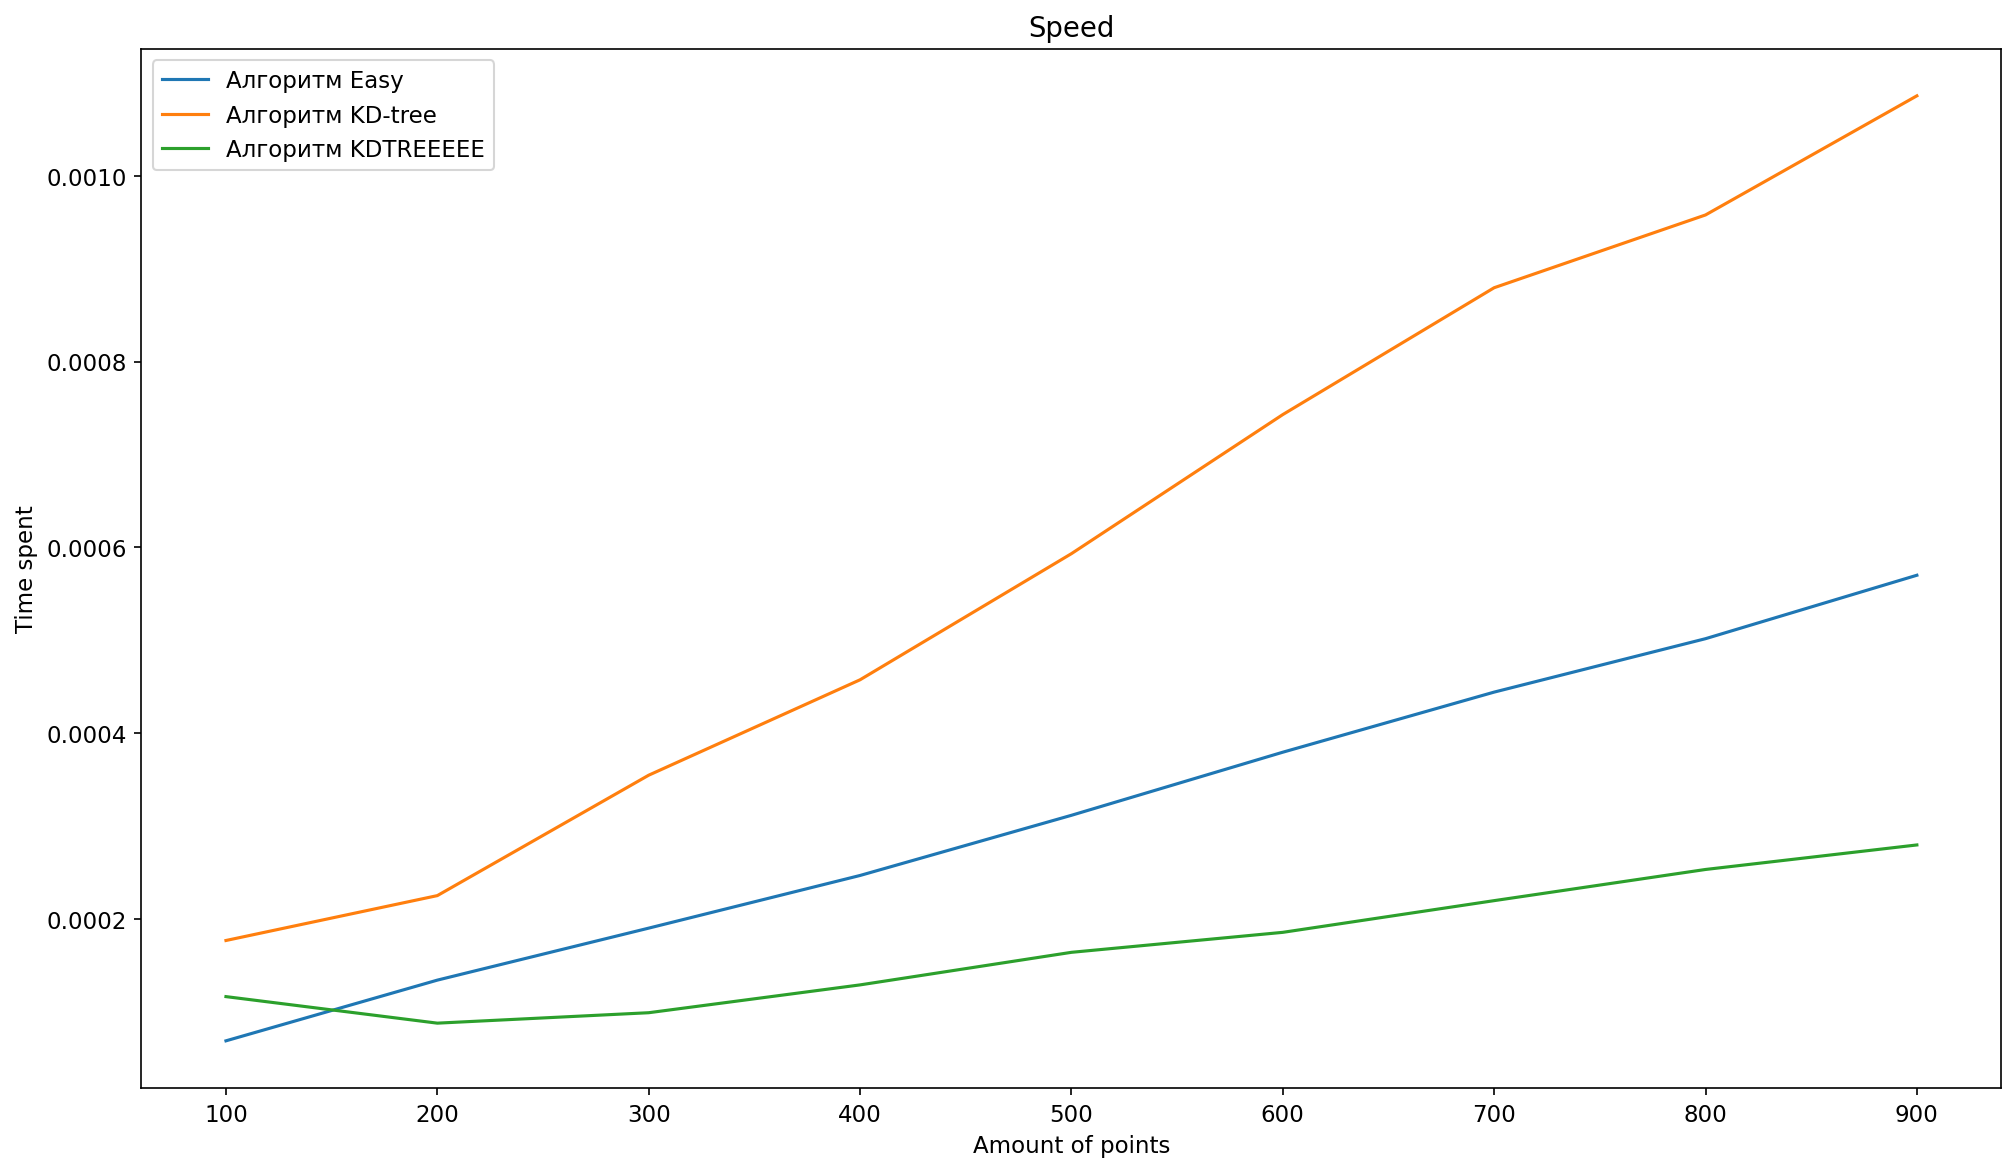

In [14]:
import math
import matplotlib.pyplot as plt
import random
from scipy.spatial import KDTree
from matplotlib.patches import Circle

import time

def generate_random_coordinates(size):
    coordinates = []
    for _ in range(size):
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        coordinates.append([x, y])
    return coordinates

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def find_nearest_neighbors_EASY(points, query_point, k):
    distances = []
    for point in points:
        distance = euclidean_distance(point, query_point)
        distances.append((point, distance))
    
    distances.sort(key=lambda x: x[1])  # Sort the distances in ascending order
    
    neighbors = [distance[0] for distance in distances[:k]]  # Get the k nearest neighbors
    max_distance = distances[k-1][1] if len(distances) >= k else 0  # Distance to the furthest neighbor
    
    return neighbors, max_distance

class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

class KD_Tree:
    def __init__(self, points):
        self.root = self.build_kdtree(points)

    def build_kdtree(self, points, depth=0):
        if not points:
            return None
        
        axis = depth % 2
        points.sort(key=lambda x: x[axis])
        median = len(points) // 2

        return Node(points[median],
                    self.build_kdtree(points[:median], depth + 1),
                    self.build_kdtree(points[median + 1:], depth + 1))

    def find_nearest_neighbors(self, query_point, k=1):
        self.nearest_neighbors = []
        self.closest_distances = [float('inf')] * k
        self._find_nearest_neighbors_helper(self.root, query_point, 0, k)
        
        return self.nearest_neighbors, max(self.closest_distances)
    
    def _find_nearest_neighbors_helper(self, node, query_point, depth, k):
        if node is None:
            return
        
        distance = self.euclidean_distance(node.point, query_point)
        if distance < self.closest_distances[0]:
            self._update_nearest_neighbors(node.point, distance, k)
        
        axis = depth % 2
        if query_point[axis] < node.point[axis]:
            self._find_nearest_neighbors_helper(node.left, query_point, depth + 1, k)
        else:
            self._find_nearest_neighbors_helper(node.right, query_point, depth + 1, k)
            
        if abs(query_point[axis] - node.point[axis]) < self.closest_distances[0]:
            if query_point[axis] < node.point[axis]:
                self._find_nearest_neighbors_helper(node.right, query_point, depth + 1, k)
            else:
                self._find_nearest_neighbors_helper(node.left, query_point, depth + 1, k)

    def _update_nearest_neighbors(self, point, distance, k):
        self.nearest_neighbors.append(point)
        self.nearest_neighbors = sorted(self.nearest_neighbors, key=lambda x: self.euclidean_distance(x, query_point))
        self.nearest_neighbors = self.nearest_neighbors[:k]
        self.closest_distances = [self.euclidean_distance(x, query_point) for x in self.nearest_neighbors]

    @staticmethod
    def euclidean_distance(point1, point2):
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def find_nearest_neighbors_KDTree(points, query_point, k=1):
    tree = KDTree(points)
    distances, indices = tree.query([query_point], k=k)
    neighbors = [points[i] for i in indices[0]]
    
    return neighbors, distances[0][-1]  # Return the nearest neighbors and the maximum distance


timeeasy=[]
timekd=[]
timetree=[]
timee=0
timek=0
timet=0
x=[]
k=2

repeats=10

for i in range(100,1000,100):
    timee=0
    timek=0
    timet=0
    for j in range(repeats):
        points=generate_random_coordinates(i)
        query_point = points[0]
        start_time=time.time()
        find_nearest_neighbors_EASY(points, query_point, 2)
        timee+=time.time()-start_time

        start_time=time.time()
        kdtree = KD_Tree(points)
        nearest_neighbors, max_distance = kdtree.find_nearest_neighbors(query_point, k)
        timek+=time.time()-start_time

        start_time=time.time()
        find_nearest_neighbors_KDTree(points, query_point, 2)
        timet+=time.time()-start_time 
        
    timeeasy.append  (timee/repeats)
    timekd.append    (timek/repeats)
    timetree.append  (timet/repeats)
    
    x.append(i)
    
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11
    
plt.plot(x, timeeasy,   label = 'Алгоритм Easy')
plt.plot(x, timekd, label = 'Алгоритм KD-tree')
plt.plot(x, timetree,  label = 'Алгоритм KDTREEEEE')

plt.xlabel('Amount of points')
plt.ylabel('Time spent')
plt.title ('Speed')

plt.legend()
plt.show()

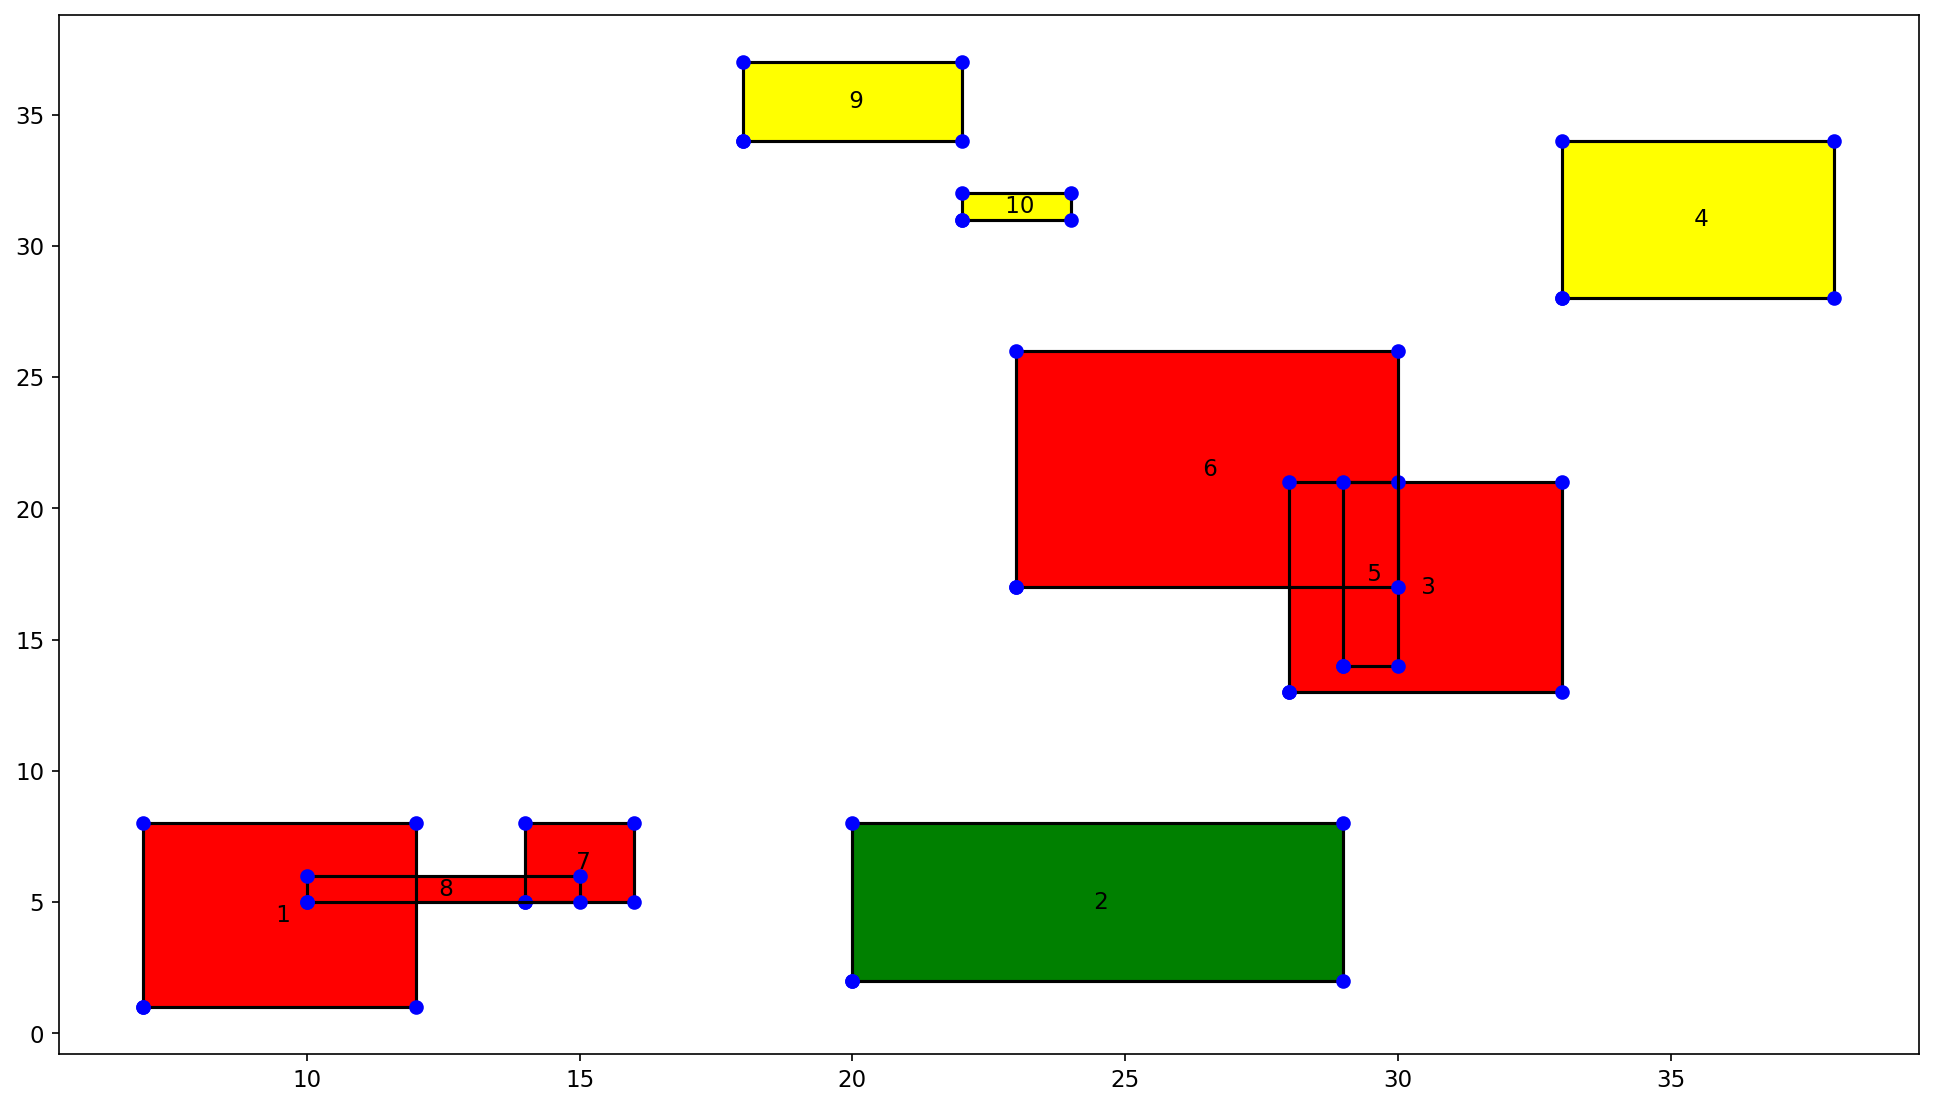

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import cascaded_union
import random

plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

def read_polygon_data(filename):
    polygons = []
    with open(filename, 'r') as file:
        for line in file:
            points = line.strip().split(';')
            polygon_points = [tuple(map(float, point.split(','))) for point in points]
            polygons.append(ShapelyPolygon(polygon_points))
    return polygons

import random

def check_intersection(polygons):
    intersecting_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.intersects(polygon2):
                intersecting_polygons.append(polygon1)
                intersecting_polygons.append(polygon2)
    return intersecting_polygons




def check_minimum_distance(polygons, min_distance):
    violating_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.distance(polygon2) < min_distance:
                violating_polygons.append(polygon1)
                violating_polygons.append(polygon2)
    return violating_polygons

def visualize_polygons(polygons, intersecting_polygons, violating_polygons):
    fig, ax = plt.subplots()

    for polygon in polygons:
        # Draw the polygon outline
        outline = polygon.exterior
        ax.plot(*outline.xy, color='black')

        # Draw the polygon fill
        patch = Polygon(list(polygon.exterior.coords), facecolor='green')
        ax.add_patch(patch)

        # Draw individual points of the polygon
        for point in polygon.exterior.coords:
            ax.plot(point[0], point[1], 'bo')  # Blue circles for points

        # Add label for the polygon
        label = f' {polygons.index(polygon)+1}'
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, label, ha='center', va='center', color='black')

    for polygon in violating_polygons:
        patch = Polygon(list(polygon.exterior.coords), facecolor='yellow')
        ax.add_patch(patch)

    for polygon in intersecting_polygons:
        patch = Polygon(list(polygon.exterior.coords), facecolor='red')
        ax.add_patch(patch)

    ax.autoscale_view()
    plt.show()

# Read polygon data from file
filename = '/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randRectangles/2'
polygons = read_polygon_data(filename)

# Check intersections and minimum distance violation
intersecting_polygons = check_intersection(polygons)
violating_polygons = check_minimum_distance(polygons, min_distance=4)

# Visualize the polygons
visualize_polygons(polygons, intersecting_polygons, violating_polygons)


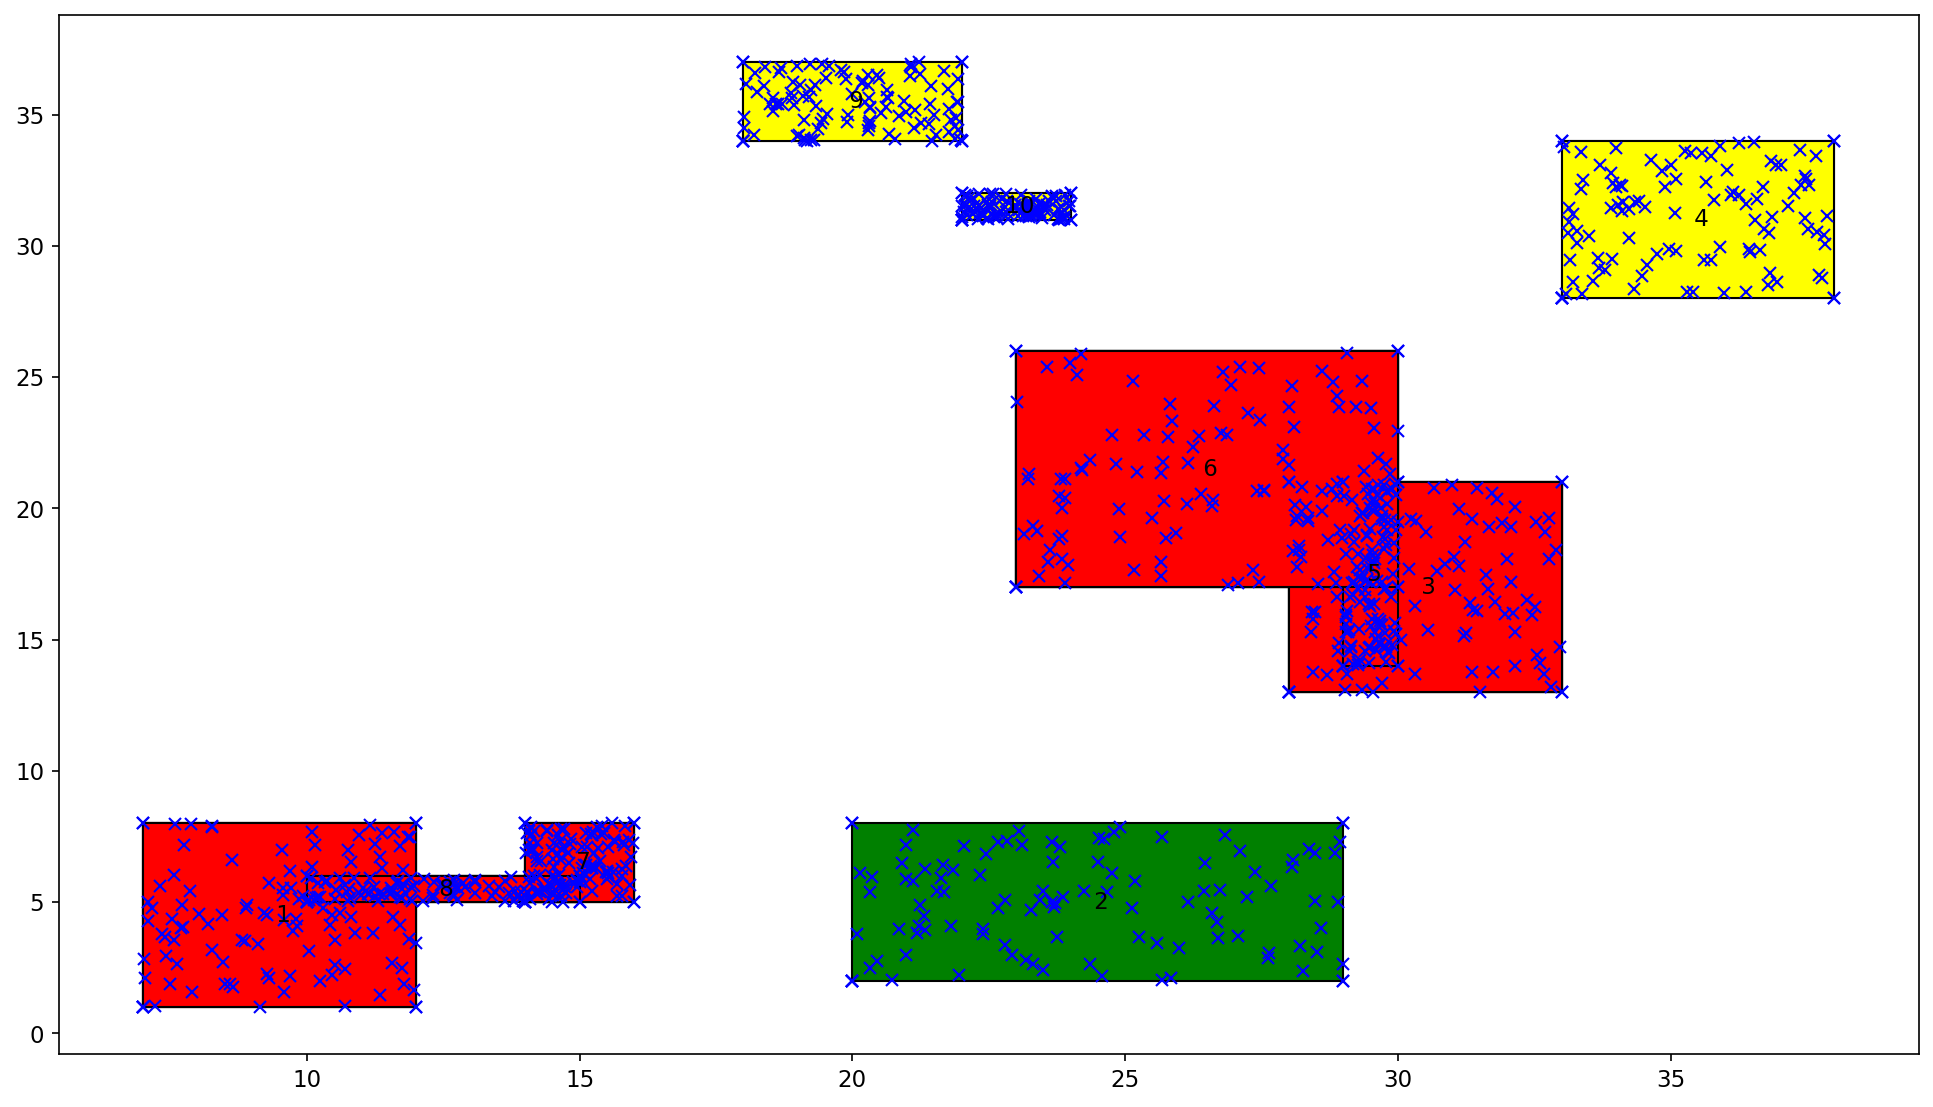

Polygons satisfy the intersection and minimum distance conditions.


In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import unary_union
import random
from shapely.geometry import Polygon, Point
from shapely.geometry import Point as ShapelyPoint

from matplotlib.patches import Polygon as PolygonPatch



plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

def read_polygon_data(filename):
    polygons = []
    with open(filename, 'r') as file:
        for line in file:
            points = line.strip().split(';')
            polygon_points = [tuple(map(float, point.split(','))) for point in points]
            polygons.append(ShapelyPolygon(polygon_points))
    return polygons

def check_intersection(polygons):
    intersecting_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.intersects(polygon2):
                intersecting_polygons.append(polygon1)
                intersecting_polygons.append(polygon2)
    return intersecting_polygons

def check_minimum_distance(polygons, min_distance):
    violating_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.distance(polygon2) < min_distance:
                violating_polygons.append(polygon1)
                violating_polygons.append(polygon2)
    return violating_polygons

def visualize_polygons(polygons, intersecting_polygons, violating_polygons, monte_carlo_points=None):
    fig, ax = plt.subplots()

    for polygon in polygons:
        # Draw the polygon outline
        outline = polygon.exterior
        ax.plot(*outline.xy, 'bx')

        # Draw the polygon fill
        coords = list(polygon.exterior.coords)
        patch = PolygonPatch(coords, facecolor='green', edgecolor='black')
        ax.add_patch(patch)

        # Draw individual points of the polygon
        for point in coords:
            ax.plot(point[0], point[1], 'bx')  # Blue circles for points

        # Add label for the polygon
        label = f' {polygons.index(polygon)+1}'
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, label, ha='center', va='center', color='black')

    for polygon in violating_polygons:
        coords = list(polygon.exterior.coords)
        patch = PolygonPatch(coords, facecolor='yellow', edgecolor='black')
        ax.add_patch(patch)

    for polygon in intersecting_polygons:
        coords = list(polygon.exterior.coords)
        patch = PolygonPatch(coords, facecolor='red', edgecolor='black')
        ax.add_patch(patch)

    if monte_carlo_points:
        # Draw Monte Carlo points
        for point in monte_carlo_points:
            ax.plot(point.x, point.y, 'bx')  # Red crosses for Monte Carlo points

    ax.autoscale_view()
    plt.show()




def random_points_within(poly):
    min_x, min_y, max_x, max_y = poly.bounds
    while True:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if poly.contains(point):
            return point

def monte_carlo_validation(polygons, num_samples=100):
    random_points = []
    for _ in range(num_samples):
        current_points = [random_points_within(polygon) for polygon in polygons]
        random_points.extend(current_points)

        for i, point1 in enumerate(current_points):
            for j, point2 in enumerate(current_points):
                if i != j and point1.intersects(point2):
                    return False
    return random_points

# Read polygon data from file
filename = '/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randRectangles/2'
polygons = read_polygon_data(filename)

# Check intersections and minimum distance violation
intersecting_polygons = check_intersection(polygons)
violating_polygons = check_minimum_distance(polygons, min_distance=4)

# Perform Monte Carlo validation and store the random points
random_points = monte_carlo_validation(polygons)

# Visualize the polygons and Monte Carlo points
visualize_polygons(polygons, intersecting_polygons, violating_polygons, monte_carlo_points=random_points)

# Check if Monte Carlo validation passed
if random_points:
    print("Polygons satisfy the intersection and minimum distance conditions.")
else:
    print("Polygons violate the intersection or minimum distance conditions.")


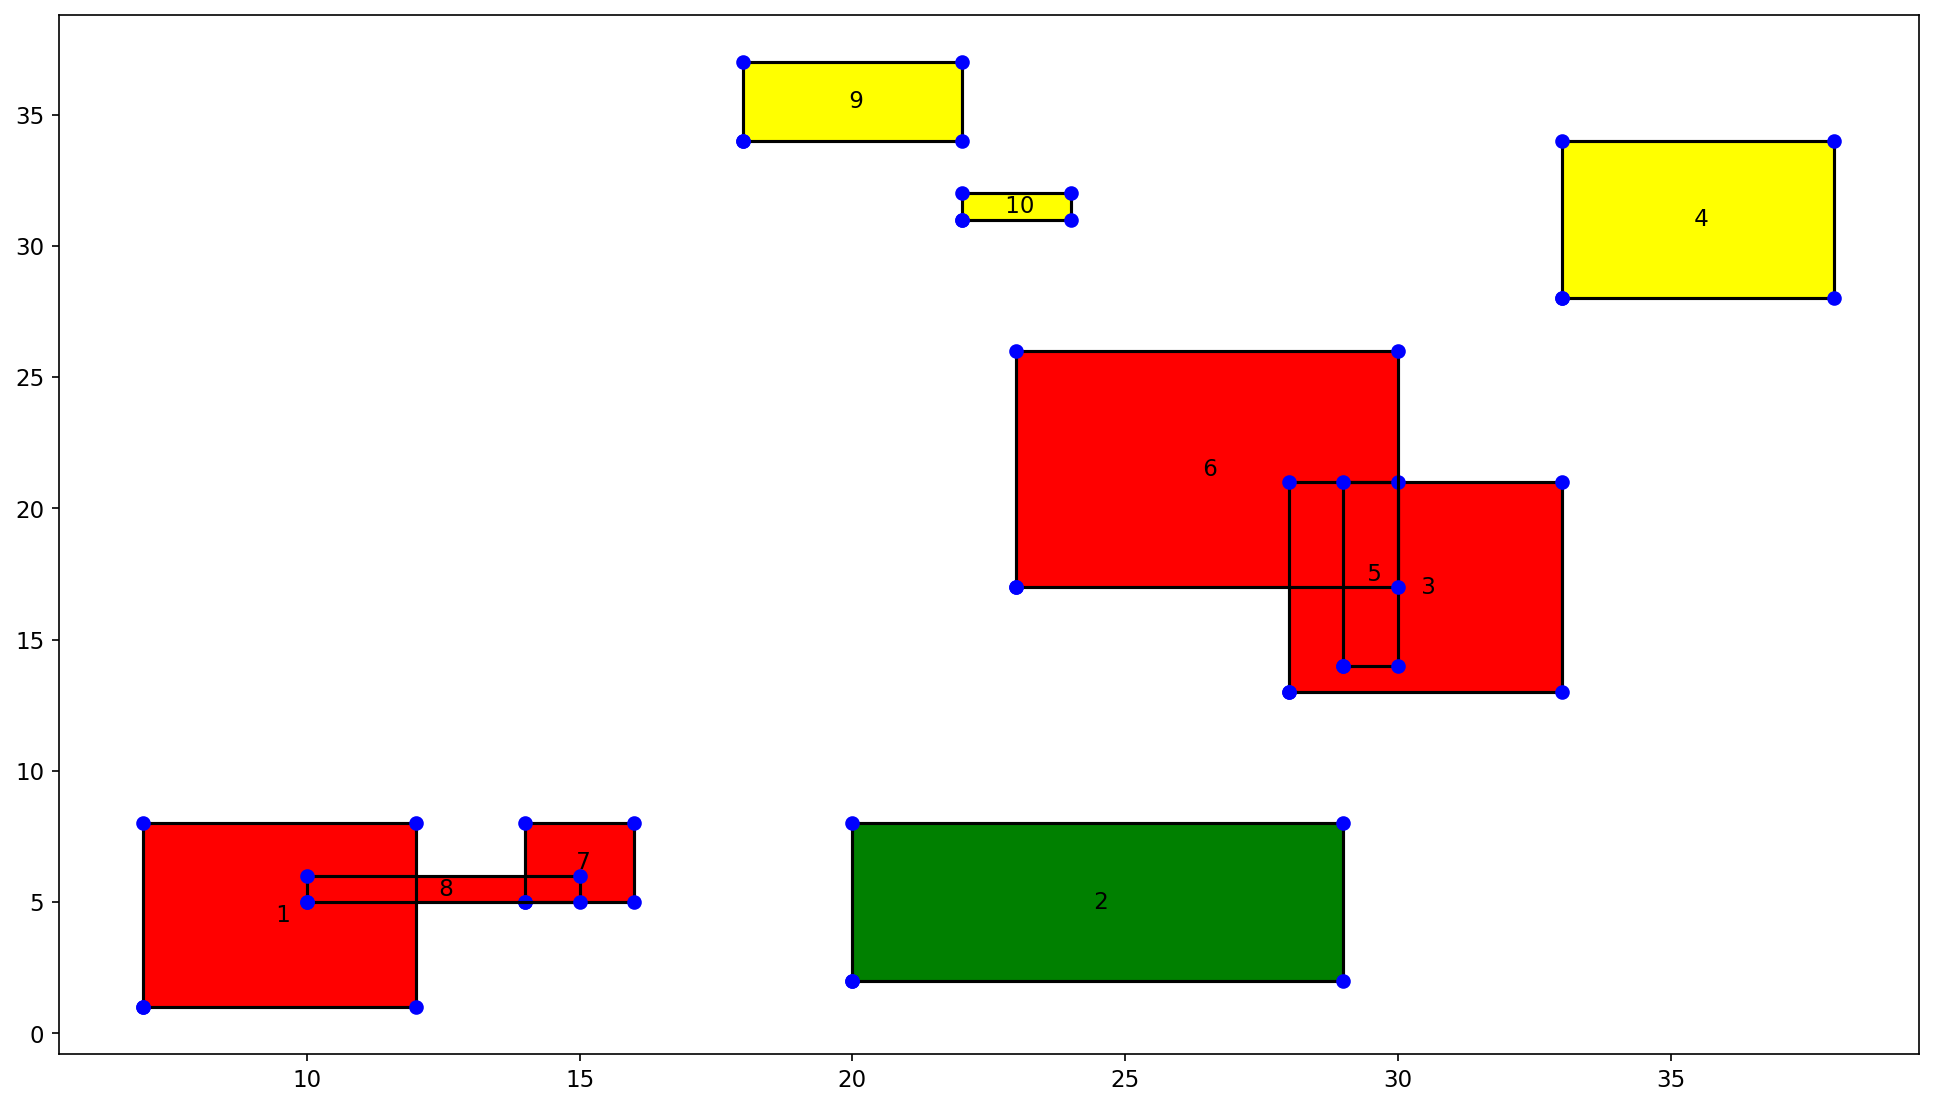

Polygons satisfy the intersection and minimum distance conditions.


In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import unary_union
import random
from shapely.geometry import Polygon, Point

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as ShapelyPolygon
from shapely.ops import cascaded_union
import random

from shapely.geometry import Point as ShapelyPoint


plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

def read_polygon_data(filename):
    polygons = []
    with open(filename, 'r') as file:
        for line in file:
            points = line.strip().split(';')
            polygon_points = [tuple(map(float, point.split(','))) for point in points]
            polygons.append(ShapelyPolygon(polygon_points))
    return polygons

def check_intersection(polygons):
    intersecting_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.intersects(polygon2):
                intersecting_polygons.append(polygon1)
                intersecting_polygons.append(polygon2)
    return intersecting_polygons

def check_minimum_distance(polygons, min_distance):
    violating_polygons = []
    for i, polygon1 in enumerate(polygons):
        for polygon2 in polygons[i + 1:]:
            if polygon1.distance(polygon2) < min_distance:
                violating_polygons.append(polygon1)
                violating_polygons.append(polygon2)
    return violating_polygons

def visualize_polygons(polygons, intersecting_polygons, violating_polygons):
    fig, ax = plt.subplots()

    for polygon in polygons:
        # Draw the polygon outline
        outline = polygon.exterior
        ax.plot(*outline.xy, color='black')

        # Draw the polygon fill
        patch = Polygon(list(polygon.exterior.coords), facecolor='green')
        ax.add_patch(patch)

        # Draw individual points of the polygon
        for point in polygon.exterior.coords:
            ax.plot(point[0], point[1], 'bo')  # Blue circles for points

        # Add label for the polygon
        label = f' {polygons.index(polygon)+1}'
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, label, ha='center', va='center', color='black')

    for polygon in violating_polygons:
        patch = Polygon(list(polygon.exterior.coords), facecolor='yellow')
        ax.add_patch(patch)

    for polygon in intersecting_polygons:
        patch = Polygon(list(polygon.exterior.coords), facecolor='red')
        ax.add_patch(patch)

    ax.autoscale_view()
    plt.show()

def random_points_within(poly):
    min_x, min_y, max_x, max_y = poly.bounds
    while True:
        point = ShapelyPoint(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if poly.contains(point):
            return point

def monte_carlo_validation(polygons, num_samples=1000):
    for _ in range(num_samples):
        random_points = [random_points_within(polygon) for polygon in polygons]

        for i, point1 in enumerate(random_points):
            for j, point2 in enumerate(random_points):
                if i != j and point1.intersects(point2):
                    return False
    return True

# Read polygon data from file
filename = '/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randRectangles/2'
polygons = read_polygon_data(filename)

# Check intersections and minimum distance violation
intersecting_polygons = check_intersection(polygons)
violating_polygons = check_minimum_distance(polygons, min_distance=4)

# Visualize the polygons
visualize_polygons(polygons, intersecting_polygons, violating_polygons)

# Perform Monte Carlo validation
if monte_carlo_validation(polygons):
    print("Polygons satisfy the intersection and minimum distance conditions.")
else:
    print("Polygons violate the intersection or minimum distance conditions.")


In [ ]:
print(point_array)

In [ ]:
file = open("/Users/died_mau5/Desktop/ZEZIN/КМ-4/individualnye_zadania/randLines/2", "r")
lines = file.readlines()
print(lines)
file.close()